# PROJET 2 : ANALYSER DES DONNEES DE SYSTEMES EDUCATIFS

*Mathieu GENTHON (février 2020)*

## SOMMAIRE<a class="anchor" id="sommaire"></a>
### 1 - [Contexte du projet](#1)<a class="anchor" id="sommaire"></a>
### 2 - [Importation des librairies et chargement dataframe](#2)<a class="anchor" id="sommaire"></a>
### 3 - [Description des fichiers CSV](#3)<a class="anchor" id="sommaire"></a>
#### 3.1 - [EdStatsCountry](#31)<a class="anchor" id="sommaire"></a>
#### 3.2 - [EdStatsCountrySeries](#32)<a class="anchor" id="sommaire"></a>
#### 3.3 - [EdStatsData](#33)<a class="anchor" id="sommaire"></a>
#### 3.4 - [EdStatsFootNote](#34)<a class="anchor" id="sommaire"></a>
#### 3.5 - [EdStatsSeries](#35)<a class="anchor" id="sommaire"></a>

### 4 - [Informations et indicateurs pour le projet d'extension](#4)<a class="anchor" id="sommaire"></a>
#### 4.1 - [Accès à Internet](#41)<a class="anchor" id="sommaire"></a>
#### 4.2 - [Scolarisation au lycée](#42)<a class="anchor" id="sommaire"></a>
#### 4.3 - [PIB et richesse des régions](#43)<a class="anchor" id="sommaire"></a>
#### 4.4 - [Pays remplissant les 3 critères](#44)<a class="anchor" id="sommaire"></a>
#### 4.5 - [Projections](#45)<a class="anchor" id="sommaire"></a>

### 1 - [Contexte du projet](#1)<a class="anchor" id="1"></a>

Vous êtes Data Scientist dans une start-up de la EdTech, nommée Academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université. Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.
Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :
- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

Pour la pré-analyse, il faut :
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

Ce travail va permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. Il faut soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

### 2 - [Importation des librairies et chargement dataframe](#2)<a class="anchor" id="2"></a>

In [178]:
# On importe les librairies dont on devrait avoir besoin pour le projet.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [101]:
# On charge les données depuis des fichiers en local et on crée des data frame pour chaque fichier.
path='C:/Users/GENTHON-M/Documents/formation/Open Classrooms/Systèmes educatifs/'
Country = pd.read_csv(path+'EdStatsCountry.csv')
CountrySeries = pd.read_csv(path+'EdStatsCountry-Series.csv')
Data = pd.read_csv(path+'EdStatsData.csv')
FootNote = pd.read_csv(path+'EdStatsFootNote.csv')
Series = pd.read_csv(path+'EdStatsSeries.csv')


### 3 - [Description des fichiers CSV](#3)<a class="anchor" id="3"></a>

#### 3.1 - [EdStatsCountry](#31)<a class="anchor" id="31"></a>
Nous avons ici des données de type général (32) sur 216 pays (214 + 2), 7 régions du monde et 18 autre découpage du monde (par niveau de revenu)

A priori ce premier fichier EdStatsCountry contient peu d'information intéressante mis à part le niveau de revenu qui peut être un critère pour pouvoir payer la formation. Nous avons également la région du monde associé à chaque pays. Il manque des données sur certaines colonnes puisqu'il n'y pas  241 objets dans chaque colonne.


In [102]:
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
Country Code                                         241 non-null object
Short Name                                           241 non-null object
Table Name                                           241 non-null object
Long Name                                            241 non-null object
2-alpha code                                         238 non-null object
Currency Unit                                        215 non-null object
Special Notes                                        145 non-null object
Region                                               214 non-null object
Income Group                                         214 non-null object
WB-2 code                                            240 non-null object
National accounts base year                          205 non-null object
National accounts reference year                     32 non-null float64
SNA price valuation

In [103]:
Country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [104]:
# Dans ce fichier, il semble que des régions du monde soient inclus dans la liste des pays. On fait un filtre sur 
# la colonne Region pour éliminer toutes les lignes qui n'ont pas de région spécifiée, puis on inverse cette matrice
#booléenne pour avoir la liste des pays. NB : Gibraltar et Nauru n'ont pas de région spécifiée et apparaisse donc dans le
# premier tri.
Region=Country[Country['Region'].isna()]
Region

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,NaN,NaN,GI,...,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# On sélectionne uniquement les zones géographiques très proche des continents.
RegionsMonde = Region['Country Code'].tolist()
RegionsMonde.remove('GIB')
RegionsMonde.remove('NRU')
RegionsMonde.remove('UMC')
RegionsMonde.remove('OED')
RegionsMonde.remove('MIC')
RegionsMonde.remove('LMY')
RegionsMonde.remove('LMC')
RegionsMonde.remove('LIC')
RegionsMonde.remove('LDC')
RegionsMonde.remove('HPC')
RegionsMonde.remove('HIC')
RegionsMonde.remove('EAP')
RegionsMonde.remove('ECA')
RegionsMonde.remove('LAC')
RegionsMonde.remove('MNA')
RegionsMonde.remove('SSA')
RegionsMonde.remove('EMU')
RegionsMonde.remove('EUU')
RegionsMonde.remove('ARB')
RegionsMonde.remove('WLD')
len(RegionsMonde)

7

In [106]:
print(RegionsMonde)

['EAS', 'ECS', 'LCN', 'MEA', 'NAC', 'SAS', 'SSF']


In [107]:
Region['Short Name'][Region['Country Code'] == 'ARB'].tolist()

['Arab World']

In [108]:
# On filtre sur les pays uniquement.
Pays=Country[np.invert(Country['Region'].isna())]
Pays

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN


In [109]:
#ON rajoute Gibraltar et Nauru
PaysMonde = Pays['Country Code'].tolist()
PaysMonde.extend(['GIB','NRU'])
len(PaysMonde)

216

In [110]:
Pays.groupby('Region')['Country Code'].unique()

Region
East Asia & Pacific           [ASM, AUS, BRN, CHN, FJI, FSM, GUM, HKG, IDN, ...
Europe & Central Asia         [ALB, AND, ARM, AUT, AZE, BEL, BGR, BIH, BLR, ...
Latin America & Caribbean     [ABW, ARG, ATG, BHS, BLZ, BOL, BRA, BRB, CHL, ...
Middle East & North Africa    [ARE, BHR, DJI, DZA, EGY, IRN, IRQ, ISR, JOR, ...
North America                                                   [BMU, CAN, USA]
South Asia                             [AFG, BGD, BTN, IND, LKA, MDV, NPL, PAK]
Sub-Saharan Africa            [AGO, BDI, BEN, BFA, BWA, CAF, CIV, CMR, COD, ...
Name: Country Code, dtype: object

In [111]:
PaysParRegion = Pays.groupby('Region')['Country Code'].unique().tolist()
PaysParRegion[5]

array(['AFG', 'BGD', 'BTN', 'IND', 'LKA', 'MDV', 'NPL', 'PAK'],
      dtype=object)

In [112]:
# Test : pays filtré en fonction d'appartenance à la région.
Pays[(Pays['Region'] == 'East Asia & Pacific')|(Pays['Region'] == 'Europe & Central Asia')|
     (Pays['Region'] == 'Latin America & Caribbean')|(Pays['Region'] == 'Middle East & North Africa') |
     (Pays['Region'] == 'North America')]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,...,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2012.0,2000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,VNM,Vietnam,Vietnam,Socialist Republic of Vietnam,VN,Vietnamese dong,Based on data from the Vietnam Statistics Offi...,East Asia & Pacific,Lower middle income,VN,...,General Data Dissemination System (GDDS),2009,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2010",Yes,2011/ 2012,2010.0,2011.0,2005,NaN
233,VUT,Vanuatu,Vanuatu,Republic of Vanuatu,VU,Vanuatu vatu,"Based on official government statistics, value...",East Asia & Pacific,Lower middle income,VU,...,General Data Dissemination System (GDDS),2009,"Multiple Indicator Cluster Survey (MICS), 2007",2013 national accounts estimates are based on ...,NaN,2007,NaN,2011.0,NaN,NaN
235,WSM,Samoa,Samoa,Samoa,WS,Samoan tala,Fiscal year ends on June 30; reporting period ...,East Asia & Pacific,Lower middle income,WS,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2009",NaN,NaN,2009,NaN,2012.0,NaN,NaN
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Nombre de pays par région
CompteurPaysParRegion = Pays.groupby('Region')['Country Code'].nunique()
CompteurPaysParRegion

Region
East Asia & Pacific           36
Europe & Central Asia         57
Latin America & Caribbean     41
Middle East & North Africa    21
North America                  3
South Asia                     8
Sub-Saharan Africa            48
Name: Country Code, dtype: int64

In [114]:
#Liste des régions du monde
ListeRegions = Pays['Region'].unique()
ListeRegions.sort()
ListeRegions

array(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'], dtype=object)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text yticklabel objects>)

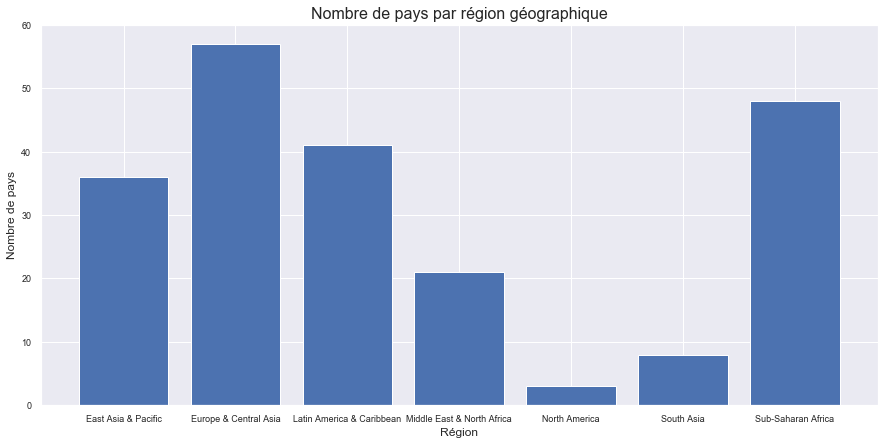

In [115]:
fig31 = plt.figure(figsize=(15,7))
axes = plt.axes()
axes.set_xlabel('Région', fontsize = 12)
axes.set_ylabel('Nombre de pays', fontsize = 12)
axes.set_ylim(0,60)
plt.title('Nombre de pays par région géographique', fontsize = 16)
plt.bar(ListeRegions,CompteurPaysParRegion)
plt.xticks(Pays['Region'].unique(),fontsize=9)
plt.yticks(fontsize=9)

#### 3.2 - [EdStatsCountrySeries](#32)<a class="anchor" id="32"></a>
Ce fichier donne les SeriesCode disponible par pays. Toutes les cellules du data frame sont pleines. Ce fichier n'est pas utile

In [116]:
CountrySeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
CountryCode    613 non-null object
SeriesCode     613 non-null object
DESCRIPTION    613 non-null object
Unnamed: 3     0 non-null float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [117]:
CountrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


#### 3.3 - [EdStatsData](#33)<a class="anchor" id="33"></a>
Ce fichier est intéressant. Il donne les valeurs de 3665 indicateurs (Indicator Name, Indicator Code) et leur valeur sur une période allant de 1970 à 2017 et donne des projections à partir de 2020 tous les 5 ans. Il y a très peu de donnée en 2016 et quasiment aucune sur 2017. Les données sont classées par pays et par région du monde. On remarque qu'il y a plus de données disponibles les année se finissant par '0' ou '5'.

In [118]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
Country Name      886930 non-null object
Country Code      886930 non-null object
Indicator Name    886930 non-null object
Indicator Code    886930 non-null object
1970              72288 non-null float64
1971              35537 non-null float64
1972              35619 non-null float64
1973              35545 non-null float64
1974              35730 non-null float64
1975              87306 non-null float64
1976              37483 non-null float64
1977              37574 non-null float64
1978              37576 non-null float64
1979              36809 non-null float64
1980              89122 non-null float64
1981              38777 non-null float64
1982              37511 non-null float64
1983              38460 non-null float64
1984              38606 non-null float64
1985              90296 non-null float64
1986              39372 non-null float64
1987              38641 non-

In [119]:
Data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# On donne le nombre d'indicateur différent
Data['Indicator Code'].nunique()

3665

In [121]:
# On cherche à construire une vue du taux de remplissage des groupes d'indicateurs par année. On isole le groupe de 
# lettre avant le premier point
Groupe_df = Data['Indicator Code'].str.split('.',  expand= True)
Data['Indicator Group'] = Groupe_df[0]
Data['Indicator Group']


0         UIS
1         UIS
2         UIS
3         UIS
4          SE
         ... 
886925    UIS
886926     SE
886927     SE
886928     SE
886929     SE
Name: Indicator Group, Length: 886930, dtype: object

In [122]:
# Voici la liste des différents groupe d'indicateurs
Groupe = Data['Indicator Group'].unique().tolist()
Groupe

['UIS',
 'SE',
 'OECD',
 'BAR',
 'HH',
 'LO',
 'NY',
 'XGDP',
 'IT',
 'SL',
 'SH',
 'SP',
 'SABER',
 'PRJ']

In [20]:
#Méthode suggéré par mentor pour construire heat map.
#Filter on indicator
df_temp = Data[Data['Indicator Group'].isin(Groupe)]
annee=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015',
      '2016','2017']
#Keep only relevant years
df_temp2 = df_temp[['Country Name', 'Indicator Group'] + annee]
#Set index
df_temp2.set_index(['Country Name', 'Indicator Group'], inplace = True)
#Stack to have pivot table
df_temp3 = pd.DataFrame(df_temp2.stack(dropna=False)).reset_index()
#Rename column
df_temp3.columns = ['Country Name', 'Indicator Group', 'Annee', 'Value']
#Count filled value (supposed Country name is always filled)
df_final = df_temp3.groupby(['Indicator Group','Annee']).count()\
           .rename(columns={"Country Name": "nb_row", "Value": "nb_fill_value"}).reset_index()
df_final['remplissage'] = df_final['nb_fill_value'] / df_final['nb_row']
df_final2 = df_final[['Indicator Group', 'Annee','remplissage']]
df_final3 = df_final2.pivot(index = 'Indicator Group', columns = 'Annee', values = 'remplissage')
df_final3

Annee,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Indicator Group,,,,,,,,,,,,,,,,,,
BAR,0.595041,0.000000,0.000000,0.000000,0.000000,0.595041,0.000000,0.000000,0.000000,0.000000,0.595041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HH,0.024793,0.010744,0.005785,0.023140,0.014050,0.053190,0.040810,0.020000,0.019339,0.010744,0.029818,0.021438,0.028512,0.013223,0.024380,0.009752,0.000000,0.000000
IT,0.842975,0.886364,0.888430,0.869835,0.878099,0.865702,0.700413,0.574380,0.526860,0.475207,0.469008,0.473140,0.469008,0.466942,0.460744,0.460744,0.460744,0.000000
LO,0.010603,0.003093,0.000000,0.026251,0.000071,0.000213,0.030561,0.019239,0.000225,0.027417,0.000830,0.021273,0.033133,0.002761,0.004709,0.039924,0.002667,0.000000
NY,0.881887,0.888085,0.898760,0.899449,0.902204,0.902204,0.903237,0.903926,0.903581,0.901515,0.905303,0.905303,0.893251,0.893595,0.868802,0.863636,0.843664,0.000000
OECD,0.094525,0.087552,0.090651,0.080837,0.062758,0.060434,0.065083,0.065083,0.066632,0.091684,0.129649,0.125517,0.125000,0.125000,0.125000,0.136105,0.000000,0.000000
PRJ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690083,0.000000,0.000000,0.000000,0.000000,0.690029,0.000000,0.000000
SABER,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002018,0.003383,0.002229,0.013473,0.015087,0.009648,0.007880,0.007515,0.002748
SE,0.468471,0.471504,0.480199,0.469617,0.494745,0.492595,0.481584,0.508647,0.514045,0.520040,0.519515,0.529499,0.524268,0.502890,0.494172,0.366455,0.056824,0.000000


In [21]:
df_final3.index

Index(['BAR', 'HH', 'IT', 'LO', 'NY', 'OECD', 'PRJ', 'SABER', 'SE', 'SH', 'SL',
       'SP', 'UIS', 'XGDP'],
      dtype='object', name='Indicator Group')

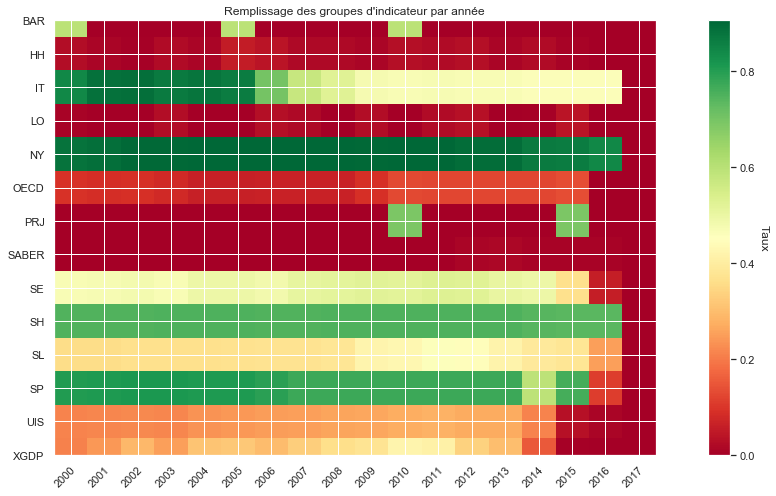

In [22]:
fig,ax = plt.subplots(figsize=(15,7))

im = ax.imshow(df_final3,cmap = 'RdYlGn')
# On règle nos axes à la longueur de nos listes d'entrée
ax.set_xticks(np.arange(len(annee)))
ax.set_yticks(np.arange(len(Groupe)))

# ON étiquette nos axes avec nos listes
ax.set_xticklabels(annee)
ax.set_yticklabels(df_final3.index)
# On crée la légende (barre de couleur)
cbar = fig.colorbar(im, ticks = [0,0.2,0.4,0.6,0.8,1],cmap = 'RdYlGn')
cbar.ax.set_ylabel('Taux', rotation=-90, va="bottom")


# Rotation des étiquettes + alignement
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Remplissage des groupes d'indicateur par année")

fig.tight_layout()
plt.show()


In [23]:
# On compte le nombre de cellules remplies dans le data frame sur la colonne 2000 pour les indicateurs SABER
Data['2000'][Data['Indicator Group'] == 'SABER'].notna().sum()

0

In [24]:
# On compte le nombre de cellules sur l'année 2000 et on applique le filtre SABER sur Indicator Group :
len(Data['2000'][Data['Indicator Group'] == 'SABER'])

52030

In [25]:
# Méthode trouvé par moi même pour construire heat map
#On construit une liste de liste pour pouvoir alimenter une heatmap qui représente le taux de remplissage des groupes 
# d'indicateur en fonction des années.
TableIndicateur=[]
annee=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015',
      '2016','2017']
for gr in Groupe:
    table=[]
    for an in annee:
        table.append(Data[an][Data['Indicator Group'] == gr].notna().sum() / len(Data[an][Data['Indicator Group'] == gr]))
    TableIndicateur.append(table)
TableIndicateur

[[0.21289082542012994,
  0.21701121662048986,
  0.2213999857917545,
  0.21737826296305066,
  0.23623181541910376,
  0.24077845398501818,
  0.2500690678601593,
  0.2541973525302517,
  0.2610015234396584,
  0.26387474642228487,
  0.273504779495923,
  0.28036815142832333,
  0.2709394018328637,
  0.2702092558826083,
  0.212634287653824,
  0.03323150757378421,
  0.012226984615627491,
  0.0],
 [0.4684708355228586,
  0.4715043233172503,
  0.48019872927912866,
  0.4696173505947547,
  0.49474513925380975,
  0.4925954234940047,
  0.4815841016576697,
  0.5086466345005494,
  0.5140448096307266,
  0.5200401280275163,
  0.5195146419528973,
  0.5294988773706588,
  0.5242679023551331,
  0.5028901734104047,
  0.49417188171786175,
  0.36645487985477476,
  0.05682415325084794,
  0.0],
 [0.09452479338842976,
  0.08755165289256199,
  0.09065082644628099,
  0.08083677685950413,
  0.06275826446280992,
  0.06043388429752066,
  0.06508264462809918,
  0.06508264462809918,
  0.06663223140495868,
  0.091683884297

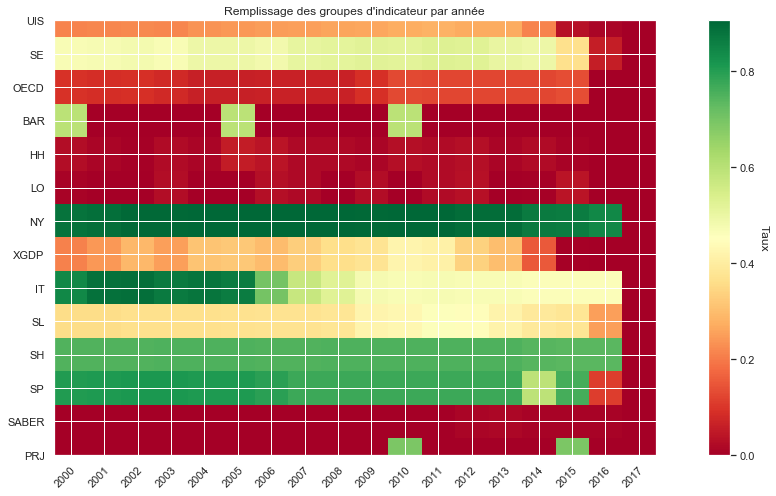

In [26]:
fig,ax = plt.subplots(figsize=(15,7))

im = ax.imshow(TableIndicateur,cmap = 'RdYlGn')
# On règle nos axes à la longueur de nos listes d'entrée
ax.set_xticks(np.arange(len(annee)))
ax.set_yticks(np.arange(len(Groupe)))

# ON étiquette nos axes avec nos listes
ax.set_xticklabels(annee)
ax.set_yticklabels(Groupe)
# On crée la légende (barre de couleur)
cbar = fig.colorbar(im, ticks = [0,0.2,0.4,0.6,0.8,1],cmap = 'RdYlGn')
cbar.ax.set_ylabel('Taux', rotation=-90, va="bottom")


# Rotation des étiquettes + alignement
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Remplissage des groupes d'indicateur par année")

fig.tight_layout()
plt.show()


Cette carte de couleur nous permet d'éliminer certains couples (groupe d'indicateur, année) sur lesquelles il y a trop de données manquantes.
On peut ainsi s'intéresser aux indicateurs appartenant aux groupes suivants :
- SE de 2000 à 2014
- BAR en 2000, 2005 et 2010
- NY de 2000 à 2016
- IT de 2000 à 2016
- SH de 2000 à 2016
- SP de 2000 à 2015
- PRJ en 2010 et 2015 ( à priori, ce sont des projections. Il serait intéressant d'avoir la carte des couleur pour PRJ sur 2020 à 2100).

In [123]:
GroupeReduit = ['SE', 'BAR', 'NY', 'IT', 'SH', 'SP', 'PRJ']
nombre = 0
for gr in GroupeReduit:
    nombre = nombre + Data['Indicator Name'][Data['Indicator Group'] == gr].nunique()
    print('Nombre indicateur pour ',gr,' : ',Data['Indicator Name'][Data['Indicator Group'] == gr].nunique())
print('Total : ',nombre)

Nombre indicateur pour  SE  :  173
Nombre indicateur pour  BAR  :  360
Nombre indicateur pour  NY  :  12
Nombre indicateur pour  IT  :  2
Nombre indicateur pour  SH  :  2
Nombre indicateur pour  SP  :  215
Nombre indicateur pour  PRJ  :  308
Total :  1072


In [124]:
# On construit une table pour les indicateurs de projection 

TableIndicateurProj=[]
anneeProj=['2020','2025','2030','2035','2040','2045','2050','2055','2060','2065','2070','2075','2080','2085','2090','2095',
      '2100']
for gr in Groupe:
    tablebis=[]
    for an in anneeProj:
        tablebis.append(Data[an][Data['Indicator Group'] == gr].notna().sum() / len(Data[an][Data['Indicator Group'] == gr]))
    TableIndicateurProj.append(tablebis)

TableIndicateurProj    

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

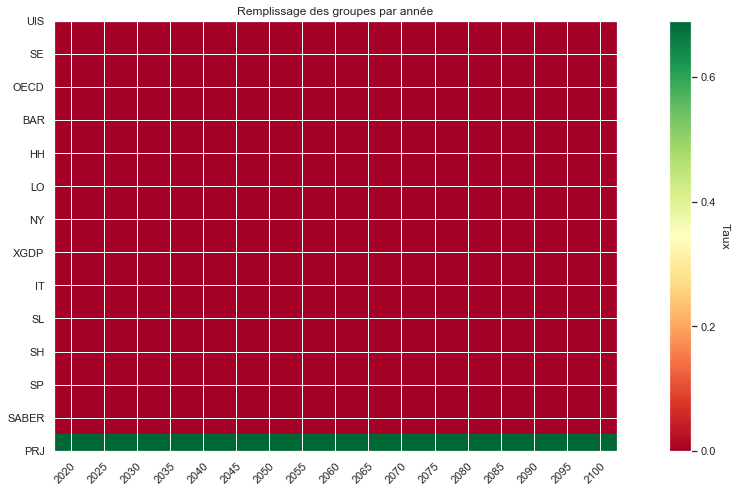

In [125]:
fig,ax = plt.subplots(figsize=(15,7))

im = ax.imshow(TableIndicateurProj,cmap = 'RdYlGn')
# On règle nos axes à la longueur de nos listes d'entrée
ax.set_xticks(np.arange(len(anneeProj)))
ax.set_yticks(np.arange(len(Groupe)))

# ON étiquette nos axes avec nos listes
ax.set_xticklabels(anneeProj)
ax.set_yticklabels(Groupe)
# On crée la légende (barre de couleur)
cbar = fig.colorbar(im, ticks = [0,0.2,0.4,0.6,0.8,1],cmap = 'RdYlGn')
cbar.ax.set_ylabel('Taux', rotation=-90, va="bottom")


# Rotation des étiquettes + alignement
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Remplissage des groupes par année")

fig.tight_layout()
plt.show()


Seuls les indicateurs de projections ont des données sur les années 2020 à 2100, ce qui semble logique. Le taux de remplissage pour PRJ est plutot bon.

#### 3.4 - [EdStatsFootNote](#34)<a class="anchor" id="34"></a>
A première vue, ce fichier n'est pas forcément utile. Toutes les cellulles sont remplies. La colonne SeriesCode a l'air de contenir les mêmes informations que IndicatorCode dans le dataframe Data.

In [126]:
FootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
CountryCode    643638 non-null object
SeriesCode     643638 non-null object
Year           643638 non-null object
DESCRIPTION    643638 non-null object
Unnamed: 4     0 non-null float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


#### 3.5 - [EdStatsSeries](#35)<a class="anchor" id="35"></a>
Ce data frame décrit les différents indicateurs d'éducation(code, définition, source, unité, périodicité,etc..). A priori les Series Code contiennent les mêmes informations que IndicatorCode dans le dataframe Data.

In [127]:
Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 20 columns):
Series Code                            3665 non-null object
Topic                                  3665 non-null object
Indicator Name                         3665 non-null object
Short definition                       2156 non-null object
Long definition                        3665 non-null object
Unit of measure                        0 non-null float64
Periodicity                            99 non-null object
Base Period                            314 non-null object
Other notes                            552 non-null object
Aggregation method                     47 non-null object
Limitations and exceptions             14 non-null object
Notes from original source             0 non-null float64
General comments                       14 non-null object
Source                                 3665 non-null object
Statistical concept and methodology    23 non-null object
Developme

In [128]:
Series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
# On rajoute les différents groupes d'indicateurs dans ce data frame.
Groupe2_df = Series['Series Code'].str.split('.',  expand= True)
Series['Indicator Group'] = Groupe2_df[0]
Series.head()


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Indicator Group
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,BAR
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,BAR
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,BAR
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,BAR
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,BAR


In [130]:
# On filtre les indicateurs appartenant au groupe IT :
Series[['Series Code','Indicator Name']][Series['Indicator Group'] == 'IT']

,Series Code,Indicator Name
610,IT.CMP.PCMP.P2,Personal computers (per 100 people)
611,IT.NET.USER.P2,Internet users (per 100 people)


**Groupe IT :** L'indicateur *IT.NET.USER.P2* sur le taux d'utilisateur d'internet est intéressant pour la Edtech Academy.

In [131]:
# On filtre les indicateurs appartenant au groupe SH :
Series[['Series Code','Indicator Name']][Series['Indicator Group'] == 'SH']

,Series Code,Indicator Name
2382,SH.DYN.AIDS.ZS,"Prevalence of HIV, total (% of population ages..."
2383,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)"


**Groupe SH :** Ces indicateurs de santé publique semblent sans grande importance pour notre étude.

In [132]:
# On filtre les indicateurs appartenant au groupe NY :
Series[['Series Code','Indicator Name','Long definition']][Series['Indicator Group'] == 'NY']

,Series Code,Indicator Name,Long definition
1658,NY.GDP.MKTP.CD,GDP (current US$),GDP at purchaser's prices is the sum of gross ...
1659,NY.GDP.MKTP.KD,GDP (constant 2010 US$),GDP at purchaser's prices is the sum of gross ...
1660,NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)",PPP GDP is gross domestic product converted to...
1661,NY.GDP.MKTP.PP.KD,"GDP, PPP (constant 2011 international $)",PPP GDP is gross domestic product converted to...
1662,NY.GDP.PCAP.CD,GDP per capita (current US$),GDP per capita is gross domestic product divid...
1663,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),GDP per capita is gross domestic product divid...
1664,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)",GDP per capita based on purchasing power parit...
1665,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation...",GDP per capita based on purchasing power parit...
1666,NY.GNP.MKTP.CD,GNI (current US$),GNI (formerly GNP) is the sum of value added b...
1667,NY.GNP.MKTP.PP.CD,"GNI, PPP (current international $)",PPP GNI (formerly PPP GNP) is gross national i...


**Groupe NY :** Ce sont des indicateurs de richesse (PIB). Nous pouvons sélectionner *NY.GDP.PCAP.CD* (GDP per capita ou PIB par habitant)

In [133]:
# On filtre les indicateurs appartenant au groupe SE :
Series[['Series Code','Indicator Name','Topic']][Series['Indicator Group'] == 'SE']

,Series Code,Indicator Name,Topic
2209,SE.ADT.1524.LT.FE.ZS,"Youth literacy rate, population 15-24 years, f...",Literacy
2210,SE.ADT.1524.LT.FM.ZS,"Youth literacy rate, population 15-24 years, g...",Literacy
2211,SE.ADT.1524.LT.MA.ZS,"Youth literacy rate, population 15-24 years, m...",Literacy
2212,SE.ADT.1524.LT.ZS,"Youth literacy rate, population 15-24 years, b...",Literacy
2213,SE.ADT.LITR.FE.ZS,"Adult literacy rate, population 15+ years, fem...",Literacy
...,...,...,...
2377,SE.XPD.SECO.ZS,Expenditure on secondary as % of government ex...,Expenditures
2378,SE.XPD.TERT.PC.ZS,Government expenditure per tertiary student as...,Expenditures
2379,SE.XPD.TERT.ZS,Expenditure on tertiary as % of government exp...,Expenditures
2380,SE.XPD.TOTL.GB.ZS,Expenditure on education as % of total governm...,Expenditures


In [134]:
#Pour les groupes SE, BAR, SP et PROJ, il y a beaucoup d'indicateur. Voyons si nous pouvons le réduire grâce à 
# l'information contenue dans la série Topic.
Series.groupby('Topic')['Indicator Group'].unique()


Topic
Attainment                                                                                      [BAR, PRJ, UIS]
Background                                                                                            [SE, UIS]
EMIS                                                                                                      [UIS]
Early Child Development (SABER)                                                                         [SABER]
Early Childhood Education                                                                             [SE, UIS]
Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita                                      [NY]
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators               [NY]
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators                     [NY]
Economic Policy & Debt: Purchasing power parity                                                   

In [135]:
# Dans le groupe SE, on va s'intéresser au Topic 'Secondary' et 'Tertiary' puisque la EdTech Academy propose des contenus
# à destination de ces personnes.
Series[['Series Code','Indicator Name']][(Series['Indicator Group'] == 'SE') & (Series['Topic'] == 'Secondary')]

,Series Code,Indicator Name
2218,SE.ENR.PRSC.FM.ZS,"Gross enrolment ratio, primary and secondary, ..."
2219,SE.ENR.SECO.FM.ZS,"Gross enrolment ratio, secondary, gender parit..."
2287,SE.SEC.AGES,Official entrance age to lower secondary educa...
2288,SE.SEC.CMPT.LO.FE.ZS,"Lower secondary completion rate, female (%)"
2289,SE.SEC.CMPT.LO.MA.ZS,"Lower secondary completion rate, male (%)"
2290,SE.SEC.CMPT.LO.ZS,"Lower secondary completion rate, both sexes (%)"
2291,SE.SEC.DURS,Theoretical duration of secondary education (y...
2292,SE.SEC.DURS.LO,Theoretical duration of lower secondary educat...
2293,SE.SEC.DURS.UP,Theoretical duration of upper secondary educat...
2294,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (..."


In [136]:
Series[['Series Code','Indicator Name']][(Series['Indicator Group'] == 'SE') & (Series['Topic'] == 'Tertiary')]

,Series Code,Indicator Name
2220,SE.ENR.TERT.FM.ZS,"Gross enrolment ratio, tertiary, gender parity..."
2284,SE.SCH.LIFE,"School life expectancy, primary to tertiary, b..."
2285,SE.SCH.LIFE.FE,"School life expectancy, primary to tertiary, f..."
2286,SE.SCH.LIFE.MA,"School life expectancy, primary to tertiary, m..."
2329,SE.TER.CMPL.FE.ZS,Gross graduation ratio from first degree progr...
2330,SE.TER.CMPL.MA.ZS,Gross graduation ratio from first degree progr...
2331,SE.TER.CMPL.ZS,Gross graduation ratio from first degree progr...
2332,SE.TER.ENRL,"Enrolment in tertiary education, all programme..."
2333,SE.TER.ENRL.FE,"Enrolment in tertiary education, all programme..."
2334,SE.TER.ENRL.FE.ZS,Percentage of students in tertiary education w...


**Groupe SE :** 
Les indicateurs suivants peuvent nous donner une idée de la profondeur du marché par pays.
- Enrolment in secondary eduction, both sexes(number) *SE.SEC.ENRL*
- Gross enrolment ratio, secondary, both sexes (%) *SE.SEC.ENRR*
- Enrolment in tertiary education, all programmes, both sexes (number)*SE.TER.ENRL*
- Gross enrolment ratio, tertiary, both sexes (%) *SE.TER.ENRR*

In [137]:
Series[['Series Code','Indicator Name']][(Series['Indicator Group'] == 'SP') ]

,Series Code,Indicator Name
2401,SP.POP.0014.FE.IN,"Population ages 0-14, female"
2402,SP.POP.0014.MA.IN,"Population ages 0-14, male"
2403,SP.POP.0014.TO,"Population ages 0-14, total"
2404,SP.POP.0014.TO.ZS,Population ages 0-14 (% of total)
2405,SP.POP.0305.FE.UN,"Population, ages 3-5, female"
...,...,...
2611,SP.SEC.UTOT.IN,Population of the official age for upper secon...
2612,SP.SEC.UTOT.MA.IN,Population of the official age for upper secon...
2613,SP.TER.TOTL.FE.IN,Population of the official age for tertiary ed...
2614,SP.TER.TOTL.IN,Population of the official age for tertiary ed...


**Groupe SP :**
- Population of the official age for secondary education, both sexes (number) : *SP.SEC.TOTL.IN*
- Population of the official age for tertiary education, both sexes (number) : *SP.TER.TOTL.IN*

In [138]:
Series[['Series Code','Indicator Name']][(Series['Indicator Group'] == 'BAR') ]

,Series Code,Indicator Name
0,BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age...
1,BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 ...
2,BAR.NOED.15UP.FE.ZS,Barro-Lee: Percentage of female population age...
3,BAR.NOED.15UP.ZS,Barro-Lee: Percentage of population age 15+ wi...
4,BAR.NOED.2024.FE.ZS,Barro-Lee: Percentage of female population age...
...,...,...
355,BAR.TER.SCHL.6569.FE,Barro-Lee: Average years of tertiary schooling...
356,BAR.TER.SCHL.7074,Barro-Lee: Average years of tertiary schooling...
357,BAR.TER.SCHL.7074.FE,Barro-Lee: Average years of tertiary schooling...
358,BAR.TER.SCHL.75UP,Barro-Lee: Average years of tertiary schooling...


**Groupe BAR :**
Etant donné que nos clients potentiels sont des lycées et des étudiants, nous pouvons définir une range sur l'âge. Des indicateurs  sur des populations entre 14 et 25 ans peuvent être plus pertinents :
- Barro-Lee: Percentage of population age 15-19 with secondary schooling. Total (Incomplete and Completed Secondary) *BAR.SEC.ICMP.1519.ZS*
- Barro-Lee: Percentage of population age 20-24 with secondary schooling. Total (Incomplete and Completed Secondary) *BAR.SEC.ICMP.2024.ZS* 
- Barro-Lee: Percentage of population age 15-19 with secondary schooling. Completed Secondary *BAR.SEC.CMPT.1519.ZS*
- Barro-Lee: Percentage of population age 20-24 with secondary schooling. Completed Secondary *BAR.SEC.CMPT.2024.ZS* 
- Barro-Lee: Population in thousands, age 15-19,and age 20-24 total*BAR.POP.1519* et *BAR.POP.2024*
Si on les compare au taux de scolarisation, on peut sans doute calculer un taux de réussite au lycée qui pourrait être un bon indicateur.
De la même façon que pour le lycée, nous avons les même indicateur pour les études supérieures : *BAR.TER.ICMP.1519.ZS, BAR.TER.ICMP.2024.ZS, BAR.TER.CMPT.1519.ZS, BAR.TER,CMPT.2024.ZS*).



In [139]:
Series[['Series Code','Indicator Name']][(Series['Indicator Group'] == 'PRJ') ]

,Series Code,Indicator Name
1686,PRJ.ATT.1519.1.FE,Projection: Percentage of the population age 1...
1687,PRJ.ATT.1519.1.MA,Projection: Percentage of the population age 1...
1688,PRJ.ATT.1519.1.MF,Projection: Percentage of the population age 1...
1689,PRJ.ATT.1519.2.FE,Projection: Percentage of the population age 1...
1690,PRJ.ATT.1519.2.MA,Projection: Percentage of the population age 1...
...,...,...
1989,PRJ.POP.ALL.NED.MA,Projection: Population in thousands by highest...
1990,PRJ.POP.ALL.NED.MF,Projection: Population in thousands by highest...
1991,PRJ.POP.ALL.S1.FE,Projection: Population in thousands by highest...
1992,PRJ.POP.ALL.S1.MA,Projection: Population in thousands by highest...


**Groupe PR :**
Les indicateurs montrant des projection sur les niveaux d'éducation à venir peuvent être intéressant à étudier comme par exemple : PRJ.POP.ALL.3, PRJ.POP.ALL.4, nous pourrons estimer le nombre de clients potentiels.

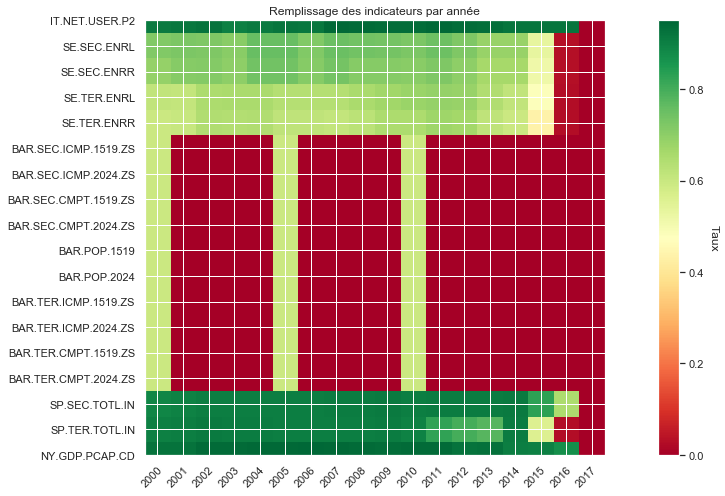

In [45]:
# On construit une liste de liste pour pouvoir alimenter une heatmap qui représente le taux de remplissage des indicateurs
# en fonction des années.
TableIndicateurSpe=[]
annee=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015',
      '2016','2017']
Indicateur = ['IT.NET.USER.P2', 'SE.SEC.ENRL', 'SE.SEC.ENRR', 'SE.TER.ENRL', 'SE.TER.ENRR', 'BAR.SEC.ICMP.1519.ZS',
              'BAR.SEC.ICMP.2024.ZS', 'BAR.SEC.CMPT.1519.ZS', 'BAR.SEC.CMPT.2024.ZS', 'BAR.POP.1519', 'BAR.POP.2024',
              'BAR.TER.ICMP.1519.ZS', 'BAR.TER.ICMP.2024.ZS', 'BAR.TER.CMPT.1519.ZS', 'BAR.TER.CMPT.2024.ZS',
              'SP.SEC.TOTL.IN','SP.TER.TOTL.IN','NY.GDP.PCAP.CD' ]
for ind in Indicateur:
    table=[]
    for an in annee:
        table.append(Data[an][Data['Indicator Code'] == ind].notna().sum() / len(Data[an][Data['Indicator Code'] == ind]))
    TableIndicateurSpe.append(table)
TableIndicateurSpe

fig,ax = plt.subplots(figsize=(15,7))

im3 = ax.imshow(TableIndicateurSpe,cmap = 'RdYlGn')
# On règle nos axes à la longueur de nos listes d'entrée
ax.set_xticks(np.arange(len(annee)))
ax.set_yticks(np.arange(len(Indicateur)))

# ON étiquette nos axes avec nos listes
ax.set_xticklabels(annee)
ax.set_yticklabels(Indicateur)
# On crée la légende (barre de couleur)
cbar = fig.colorbar(im3, ticks = [0,0.2,0.4,0.6,0.8,1],cmap = 'RdYlGn')
cbar.ax.set_ylabel('Taux', rotation=-90, va="bottom")


# Rotation des étiquettes + alignement
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Remplissage des indicateurs par année")

fig.tight_layout()
plt.show()

In [345]:
# On construit une liste de liste pour pouvoir alimenter une heatmap qui représente le taux de remplissage des indicateurs
# de projection en fonction des années.

TableIndicateurProjSpe = []
anneeProj=['2020','2025','2030','2035','2040','2045','2050','2055','2060','2065','2070','2075','2080','2085','2090','2095',
      '2100']
IndicateurProjSpe = ['PRJ.ATT.1519.4.MF', 'PRJ.ATT.1519.3.MF', 'PRJ.ATT.2024.3.MF', 'PRJ.ATT.2024.4.MF',
                     'PRJ.POP.ALL.3.MF', 'PRJ.POP.ALL.4.MF']
for ind in IndicateurProjSpe:
    table=[]
    for an in anneeProj:
        table.append(Data[an][Data['Indicator Code'] == ind].notna().sum() / len(Data[an][Data['Indicator Code'] == ind]))
    TableIndicateurProjSpe.append(table)

print(TableIndicateurProjSpe)

# Ppur les indicateurs de projection, toutes ont le même taux de remplissage (par indicateur et par année)

[[0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992], [0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992], [0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.6900826446280992, 0.690082644628

#### 3.6 - [Conclusion sur la pertinence des fichiers](#36)<a class="anchor" id="36"></a>

A priori, nous utiliserons les données issues des fichiers EdStatsData, EdStatCountry et EdStatsSeries. Le premier regroupe les valeurs des différents indicateurs de la banque mondiale pour les pays. Le deuxième permet d'associer chaque pays à une région du monde. Le troisième nous permet d'avoir une définition de chaque indicateur.

Nous avons sélectionné plusieurs indicateurs qui sont pertinents d'analyser pour des décisions d'ouverture vers de nouveaux pays.
Un premier indicateur sur les infrastructures et l'accès à Internet qui est indispensable pour accéder à notre plateforme.
Un second type d'indicateur intéressant est le taux de scolarisation au lycée et en étude supérieure, ainsi que le nombre d'étudiants et lycéens pour avoir une idée du marché potentiel. Nous avons deux sources potentielles pour ce type d'indicateur (UNESCO Institute of Statistics et les études de Barro-Lee). Etant donnée que les indicateurs de Barro-Lee et de l'UNESCO, que nous avons sélectionné,  mesure la même chose, il est plus intéressant d'analyser les indicateurs de l'UNESCO car ils sont disponibles tous les ans et ils ont des données plus récentes (2015).
Un troisième indicateur sur la richesse de la zone est sélectionné.

Tous les indicateurs ont des bons taux de remplissage de 2000 à 2015 (voir 2016 pour certains), sauf les indicateurs de Barro-Lee disponible tous les 5 ans uniquement (2000, 2005, 2010)

Concernant les projections, nous avons également sélectionné des données qui estiment des taux de scolarisation au lycée et en étude supérieure ainsi que les popultations dans ces catégories. On peut voir que les taux de remplissage sont identiques entre les indicateurs et par année.


### 4 - [Informations et indicateurs pour le projet d'extension](#4)<a class="anchor" id="4"></a>

#### 4.1 - [Accès à Internet](#41)<a class="anchor" id="41"></a>

In [140]:
# ON veut sélectionner uniquement les indicateurs d'accès à Internet.
MasqueAccesInternet = Data['Indicator Code'] == 'IT.NET.USER.P2'
AccesInternet = Data[MasqueAccesInternet].copy()
AccesInternet.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Indicator Group
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT
5040,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT
8705,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT
12370,Euro area,EMU,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT
16035,Europe & Central Asia,ECS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IT


In [141]:
AccesInternet.shape

(242, 71)

In [142]:
#On supprime les annees avant 2000 et après 2016. Comment l'écrire sans avoir à écrire toute la liste? avec range?
#Remarque MGN : on a pas besoin de faire ça vu la suite du code
AccesInternet.drop(['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999'],1,inplace=True)
AccesInternetClean=AccesInternet.drop(['2020','2025','2030','2035','2040','2045','2050','2055','2060','2065','2070','2075','2080','2085','2090','2095','2100'],1)
AccesInternetClean[AccesInternetClean['Country Code']=='FRA']

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 69,Indicator Group
338555,France,FRA,Internet users (per 100 people),IT.NET.USER.P2,14.307924,26.325904,30.18,36.14,39.15,42.87,...,77.28,77.819999,81.44,81.9198,83.75,84.6945,85.6222,NaN,NaN,IT


In [143]:
# Nous sélectionnons les données par régions géographiques
AccesInternetRegion = AccesInternetClean[AccesInternetClean['Country Code'].isin(RegionsMonde)]
    

In [144]:
result={}
def EvolutionRegionAnnee(df) :
    for reg in RegionsMonde:
        nameList = str(reg)
        result[nameList] = []
        for an in annee:
            result[nameList].append(df[an][df['Country Code'] == reg].tolist())
    print(result)
    

EvolutionRegionAnnee(AccesInternetRegion)


{'EAS': [[5.59267987619975], [7.25216610885268], [8.99358781820125], [10.547243645707901], [12.596964208773699], [14.6663590411098], [16.6178275669865], [20.7665234457067], [25.2535662134479], [29.513197608660803], [34.2308383100865], [37.365155967458], [40.709345490799606], [44.577349432458604], [46.812103208352006], [49.7879236470475], [52.7963207892303], [nan]], 'ECS': [[13.1841466737921], [16.405569321507002], [23.057519317659196], [28.3633742254841], [32.3590858652093], [35.2269322280585], [38.0834867000107], [43.6743815037404], [47.35904473065129], [50.5660384154691], [56.1191173283575], [58.834630390890005], [63.486253443122905], [66.306668615053], [68.9443512173395], [71.16200266705029], [73.9147507289322], [nan]], 'LCN': [[3.90371304036598], [5.65075369112733], [8.88734994520372], [11.287153180762699], [14.4023870665381], [16.629789841534702], [20.752634062368898], [23.7029350820608], [26.500479061627498], [31.034304128483], [34.7096220522286], [39.3464704130905], [43.18401807

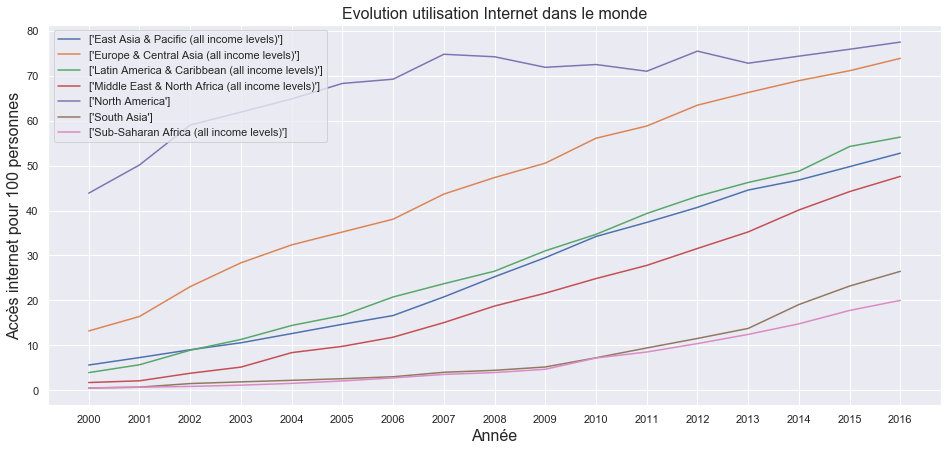

In [145]:
fig, ax = plt.subplots(figsize=(16,7))


for reg in RegionsMonde:
    line, = ax.plot(annee, result[reg], label = str(Region['Short Name'][Region['Country Code'] == reg].tolist()))

ax.set_xlabel('Année', fontsize = 16)
ax.set_ylabel('Accès internet pour 100 personnes', fontsize = 16)
plt.title('Evolution utilisation Internet dans le monde', fontsize = 16)  
ax.legend()
plt.show()

Comme attendu, on peut observer que dans les pays développés, l'utilisation d'Internet est désormais courante. De manière générale, l'accès à internet s'améliore partout dans le monde. L'utilisation d'Internet est très peu développé en Afrique Subsaharienne et dans le sud de l'Asie avec moins de 30 % d'utilisateurs en 2016.

In [146]:
PaysPotentielInternetParRegion = Pays['Country Code'][(Pays['Region'] == 'East Asia & Pacific')|
     (Pays['Region'] == 'Europe & Central Asia')|(Pays['Region'] == 'Latin America & Caribbean')|
     (Pays['Region'] == 'Middle East & North Africa') |(Pays['Region'] == 'North America')|
     (Pays['Region'] == 'Sub-Saharan Africa')|(Pays['Region'] == 'South Asia')].tolist()
len(PaysPotentielInternetParRegion)

214

In [147]:
# Nous sélectionnons les données par pays en supprimant les régions du monde.
AccesInternetPays = AccesInternetClean[AccesInternetClean['Country Code'].isin(PaysPotentielInternetParRegion)]
AccesInternetPays
# On peut filtrer les pays par rapport au dernier taux d'accès à Internet connu, ce qui nous 
# donne une liste de N pays
AccesInternetPays = AccesInternetPays[AccesInternetPays['2016']>60]


In [148]:
PaysPotentielInternet = AccesInternetPays['Country Name']
PaysPotentielInternetCode = AccesInternetPays['Country Code']
TauxInternet=AccesInternetPays['2016']
PaysPotentielInternet

96665                  Albania
107660                 Andorra
114990     Antigua and Barbuda
118655               Argentina
122320                 Armenia
                  ...         
840660    United Arab Emirates
844325          United Kingdom
847990           United States
851655                 Uruguay
873645      West Bank and Gaza
Name: Country Name, Length: 83, dtype: object

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 7 Text yticklabel objects>)

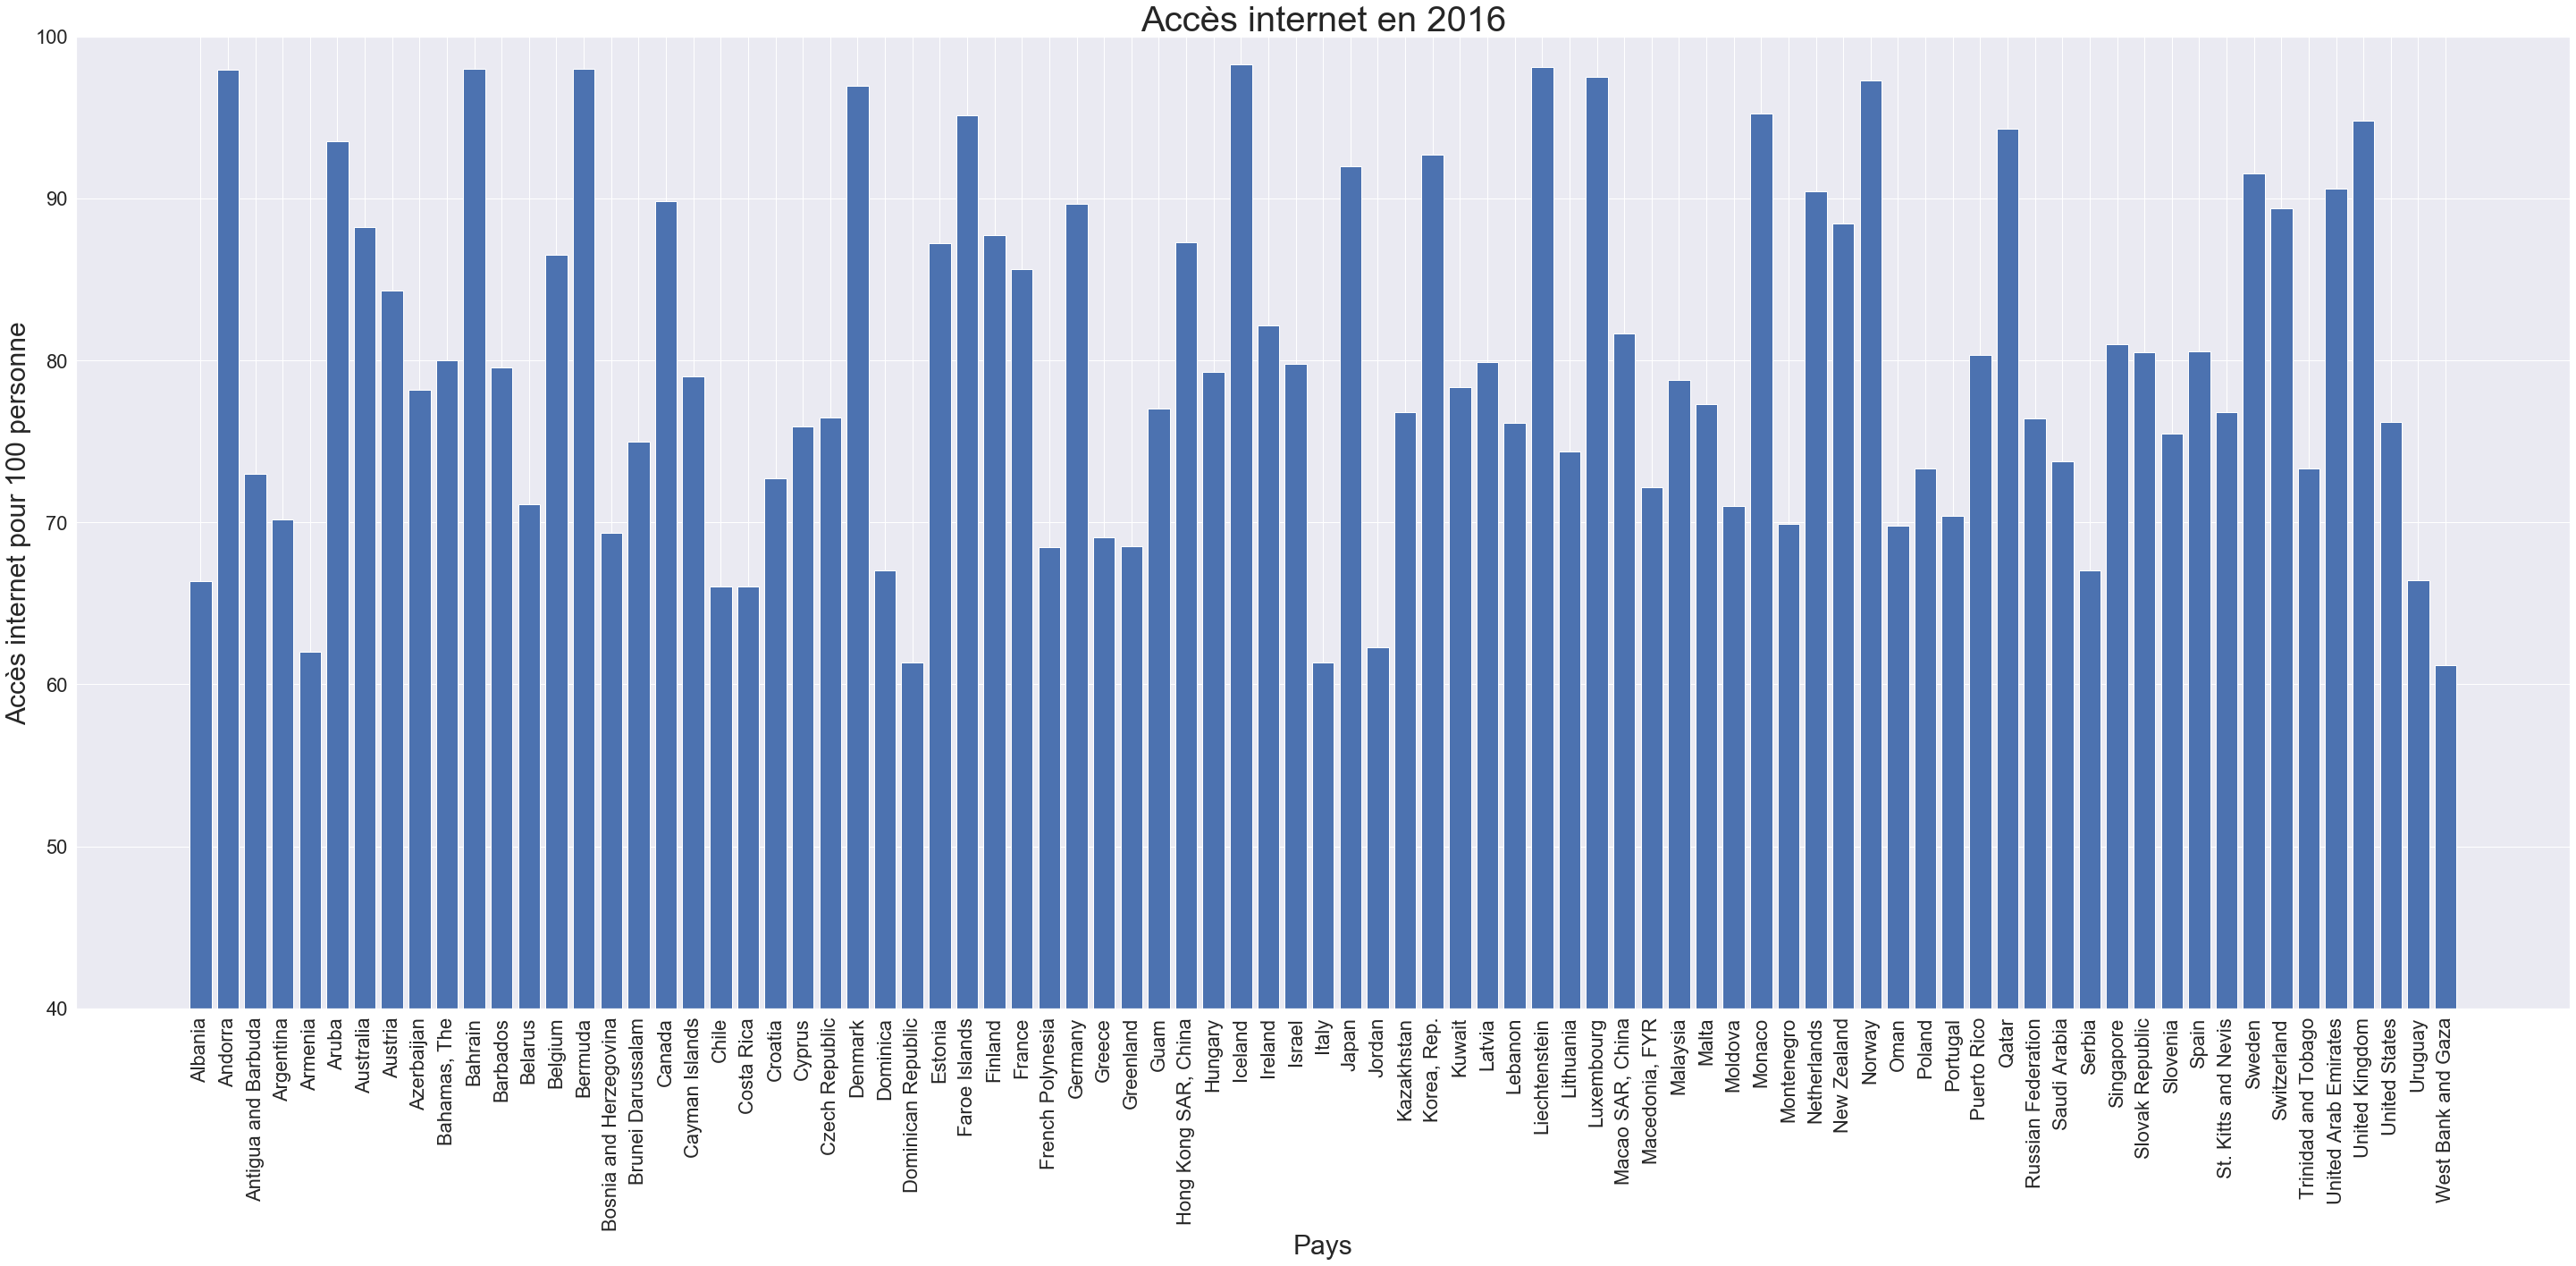

In [149]:
fig1 = plt.figure(figsize=(50,20))
axes = plt.axes()
axes.set_xlabel('Pays', fontsize = 30)
axes.set_ylabel('Accès internet pour 100 personne', fontsize = 30)
axes.set_ylim(40,100)
plt.title('Accès internet en 2016', fontsize = 40)
plt.bar(PaysPotentielInternet,TauxInternet)
plt.xticks(PaysPotentielInternet,rotation=90,fontsize=22)
plt.yticks(fontsize=22)

Ce premier filtre *PaysPotentielInternet* fait ressortir une liste de 83 pays potentiels répartis sur les régions Asie de l'Est et Pacifique, Europe et Asie centrale, Amérique du nord, Amérique latine et Caraïbes et Moyen Orient et Afrique du Nord.

#### 4.2 - [Scolarisation au lycée et à l'université](#42)<a class="anchor" id="42"></a>

In [150]:
# ON veut sélectionner uniquement les indicateurs d'accès  au lycée et à l'université sur les régions du monde pour le
# groupe SE
SeSecEnrl = Data[( Data['Indicator Code'] == 'SE.SEC.ENRL' ) & ( Data['Country Code'].isin(RegionsMonde))]
SeSecEnrr = Data[( Data['Indicator Code'] == 'SE.SEC.ENRR' ) & ( Data['Country Code'].isin(RegionsMonde))]
SeTerEnrl = Data[( Data['Indicator Code'] == 'SE.TER.ENRL' ) & ( Data['Country Code'].isin(RegionsMonde))]
SeTerEnrr = Data[( Data['Indicator Code'] == 'SE.TER.ENRR' ) & ( Data['Country Code'].isin(RegionsMonde))]
SpSecTotlIn = Data[( Data['Indicator Code'] == 'SP.SEC.TOTL.IN' ) & ( Data['Country Code'].isin(RegionsMonde))]
SpTerTotlIn = Data[( Data['Indicator Code'] == 'SP.TER.TOTL.IN' ) & ( Data['Country Code'].isin(RegionsMonde))]
SeSecEnrl


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Indicator Group
4856,East Asia & Pacific,EAS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,43519952.0,50267036.0,56118968.0,61798564.0,61542244.0,64871984.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE
15851,Europe & Central Asia,ECS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,75103024.0,75992608.0,77399336.0,78980016.0,80360736.0,81036688.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE
34176,Latin America & Caribbean,LCN,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,11059700.0,11876638.0,13542402.0,14923589.0,17706628.0,19091498.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE
56166,Middle East & North Africa,MEA,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,5099295.0,5267529.5,5967870.5,6423339.0,6930918.0,7651390.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE
67161,North America,NAC,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,22691418.0,23124412.0,23747636.0,24021080.0,24174580.0,24257432.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE
74491,South Asia,SAS,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,25374318.0,26051188.0,27180716.0,28282368.0,29159238.0,30164468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE
78156,Sub-Saharan Africa,SSF,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,5422186.0,5592967.0,5901904.0,6227642.0,6501707.5,6947168.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE


In [151]:
# On va tracer par région la population scolarisée au lycée.
EvolutionRegionAnnee(SeSecEnrl)

{'EAS': [[137120400.0], [142236000.0], [147389600.0], [153615632.0], [158087248.0], [159636672.0], [160846640.0], [163689008.0], [163093056.0], [163384176.0], [162608224.0], [161644832.0], [159734416.0], [159612656.0], [154212112.0], [nan], [nan], [nan]], 'ECS': [[85580832.0], [86736048.0], [86941888.0], [86484976.0], [83494416.0], [82032024.0], [80432096.0], [78970232.0], [77410000.0], [76399360.0], [76057120.0], [74917816.0], [73753392.0], [78725584.0], [78143392.0], [nan], [nan], [nan]], 'LCN': [[57113116.0], [57168124.0], [58307856.0], [56997856.0], [58434628.0], [58898668.0], [59208296.0], [59076008.0], [59934848.0], [60597392.0], [61178508.0], [61381448.0], [61383376.0], [64333296.0], [64141980.0], [nan], [nan], [nan]], 'MEA': [[32723112.0], [33619448.0], [34426872.0], [35778928.0], [36405056.0], [36316648.0], [36278368.0], [35983328.0], [36164492.0], [36290068.0], [36274184.0], [37471688.0], [37650796.0], [35685336.0], [35294308.0], [nan], [nan], [nan]], 'NAC': [[25117172.0], [2

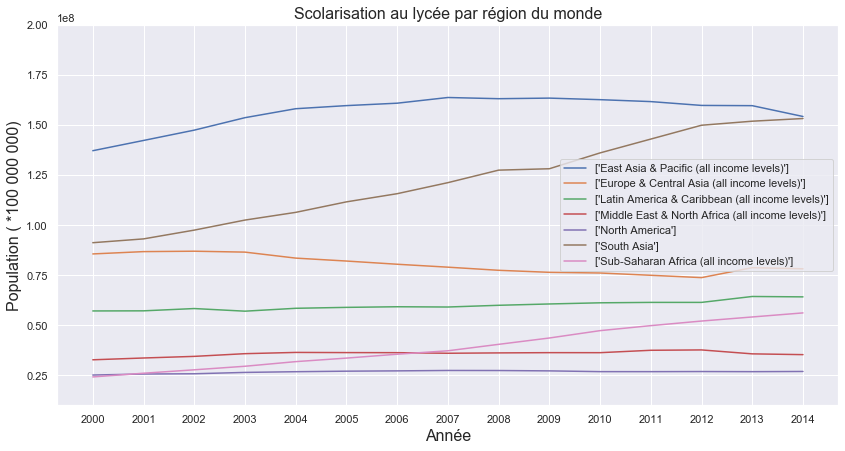

In [152]:
fig, ax = plt.subplots(figsize=(14,7))


for reg in RegionsMonde:
    line, = ax.plot(annee, result[reg], label = str(Region['Short Name'][Region['Country Code'] == reg].tolist()))

ax.set_xlabel('Année', fontsize = 16)
ax.set_ylim(10000000, 200000000) 
ax.set_ylabel('Population ( *100 000 000)', fontsize = 16)
plt.title('Scolarisation au lycée par région du monde', fontsize = 16)  
ax.legend()
plt.show()

Le plus petit marché sur le segment "lycéen" pour la EdTech est l'amérique du Nord en terme de nombre. Il représente tout de même 25 000 000 de personne en 2014. le plus gros marché est l'Asie de l'Est et Pacifique avec plus de 150 000 000 de lycéens. A priori, toutes les régions ont assez de potentiel.

{'EAS': [[217764496.0], [226375696.0], [233414848.0], [237754368.0], [239127664.0], [237469872.0], [232581744.0], [224524288.0], [215992656.0], [207757792.0], [199512864.0], [191685552.0], [185007216.0], [179607760.0], [175370928.0], [nan], [nan], [nan]], 'ECS': [[90498824.0], [90091616.0], [89214832.0], [88083440.0], [87273296.0], [86130544.0], [84141720.0], [82119504.0], [80211776.0], [79542152.0], [77721872.0], [76036096.0], [74553128.0], [74726272.0], [73745552.0], [nan], [nan], [nan]], 'LCN': [[66945256.0], [66410768.0], [66766268.0], [66860592.0], [67566824.0], [67803688.0], [68183016.0], [68273152.0], [68279296.0], [68442104.0], [68102304.0], [68751120.0], [68463544.0], [68793816.0], [68165984.0], [nan], [nan], [nan]], 'MEA': [[47787996.0], [48394732.0], [48971992.0], [50159688.0], [50185972.0], [50055144.0], [49689304.0], [49958524.0], [49355236.0], [48579816.0], [47916360.0], [47298376.0], [46861792.0], [45488260.0], [44442916.0], [nan], [nan], [nan]], 'NAC': [[26736304.0], [2

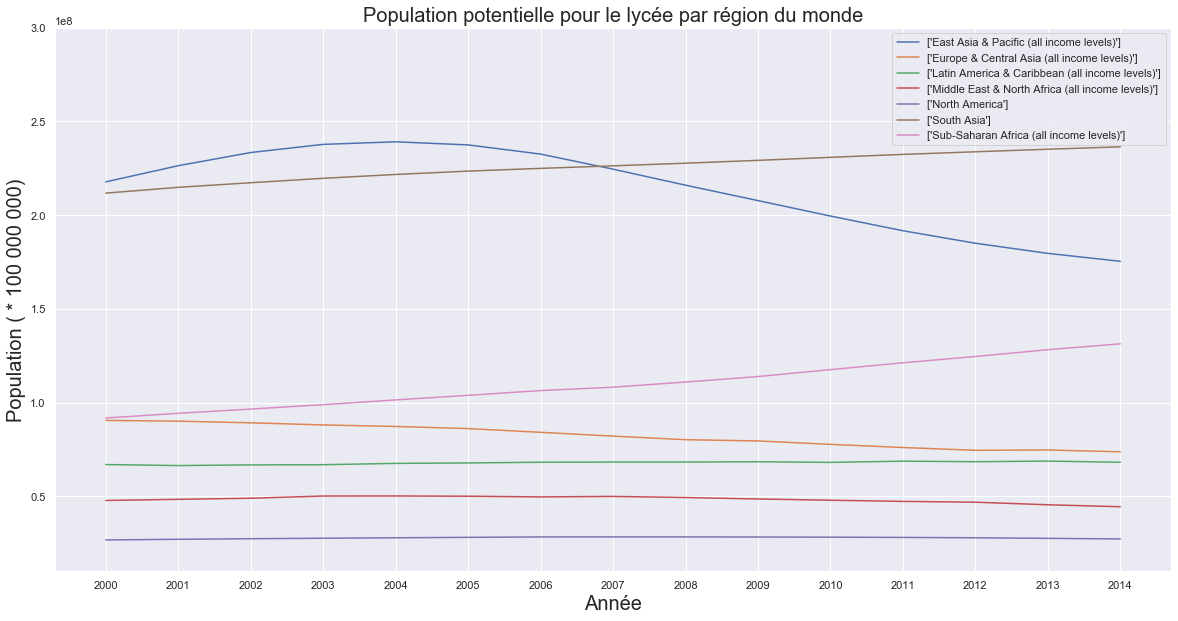

In [153]:
EvolutionRegionAnnee(SpSecTotlIn)
fig, ax = plt.subplots(figsize=(20,10))


for reg in RegionsMonde:
    line, = ax.plot(annee, result[reg], label = str(Region['Short Name'][Region['Country Code'] == reg].tolist()))

ax.set_xlabel('Année', fontsize = 20)
ax.set_ylim(10000000, 300000000) 
ax.set_ylabel('Population ( * 100 000 000)', fontsize = 20)
plt.title('Population potentielle pour le lycée par région du monde', fontsize = 20)  
ax.legend()
plt.show()

Nous pouvons voir que si le taux de scolarisation au lycée venait à s'améliorer en Asie du Sud et en Afrique Sub Saharienne, le nombre de potentiel client serait énorme sur ces deux zones.

In [154]:
EvolutionRegionAnnee(SeSecEnrr)

{'EAS': [[62.967288970947294], [62.8318290710449], [63.1449089050293], [64.6110687255859], [66.109977722168], [67.22396850585939], [69.1570281982422], [72.9048080444336], [75.5086135864258], [78.64166259765629], [81.5026321411133], [84.3281326293945], [86.3395614624023], [88.8673477172852], [87.93482208251949], [nan], [nan], [nan]], 'ECS': [[94.56568145751949], [96.27538299560551], [97.45227813720699], [98.1852798461914], [95.6700592041016], [95.2415008544922], [95.59121704101558], [96.16500854492192], [96.5070266723633], [96.0488967895508], [97.85806274414058], [98.52926635742192], [98.9272918701172], [105.351951599121], [105.963516235352], [nan], [nan], [nan]], 'LCN': [[85.3131637573242], [86.0826187133789], [87.33130645751949], [85.2488021850586], [86.4842071533203], [86.8664703369141], [86.83731079101558], [86.52890014648442], [87.7789535522461], [88.53817749023442], [89.833251953125], [89.28064727783199], [89.65847778320308], [93.5160980224609], [94.0967483520508], [nan], [nan], [

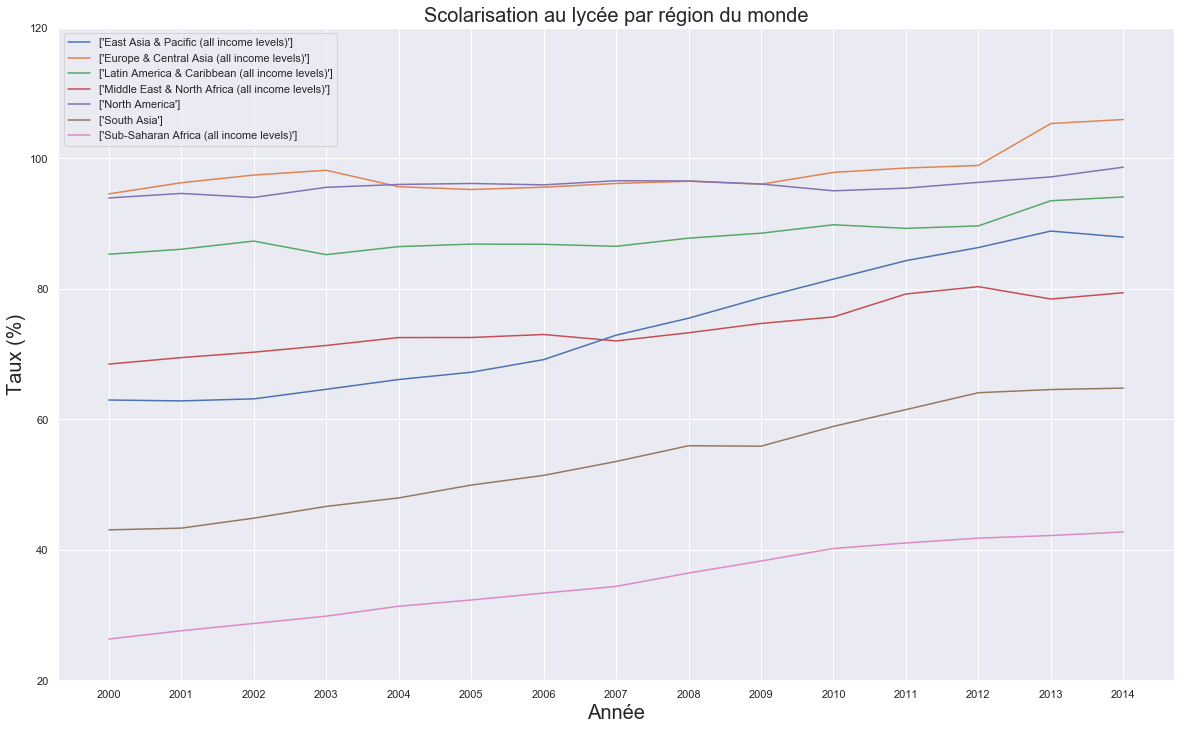

In [155]:
fig, ax = plt.subplots(figsize=(20,12))


for reg in RegionsMonde:
    line, = ax.plot(annee, result[reg], label = str(Region['Short Name'][Region['Country Code'] == reg].tolist()))

ax.set_xlabel('Année', fontsize = 20)
ax.set_ylim(20, 120) 
ax.set_ylabel('Taux (%)', fontsize = 20)
plt.title('Scolarisation au lycée par région du monde', fontsize = 20)  
ax.legend()
plt.show()

Nous avons ici des valeurs aberrantes pour l'Europe et l'Asie centrale puisque le taux de scolarisation au lycée est supérieure à 100%. L'Afrique sub-saharienne et l'Asie sont en queue de peloton.

In [156]:
EvolutionRegionAnnee(SeTerEnrl)

{'EAS': [[25257460.0], [27801408.0], [31201856.0], [34750952.0], [38188188.0], [41180440.0], [44216108.0], [46898368.0], [49295048.0], [52677596.0], [55233632.0], [56584732.0], [58874208.0], [60916176.0], [69097800.0], [nan], [nan], [nan]], 'ECS': [[28481986.0], [30305528.0], [32152828.0], [34013540.0], [34920392.0], [36152180.0], [37193784.0], [37857796.0], [38290256.0], [38756064.0], [39231380.0], [39164832.0], [38685980.0], [38299848.0], [37693412.0], [nan], [nan], [nan]], 'LCN': [[11540219.0], [12373187.0], [13389847.0], [14317194.0], [15159095.0], [16127906.0], [17381520.0], [18660016.0], [20283368.0], [20924170.0], [21823096.0], [22653000.0], [23299522.0], [23879564.0], [24087544.0], [nan], [nan], [nan]], 'MEA': [[6546920.0], [6988851.0], [7375483.0], [7694377.5], [8381251.5], [8950445.0], [9478354.0], [10297572.0], [11220022.0], [11547454.0], [12312381.0], [12516851.0], [13342759.0], [13751028.0], [14332233.0], [nan], [nan], [nan]], 'NAC': [[14415973.0], [14824003.0], [17173894.

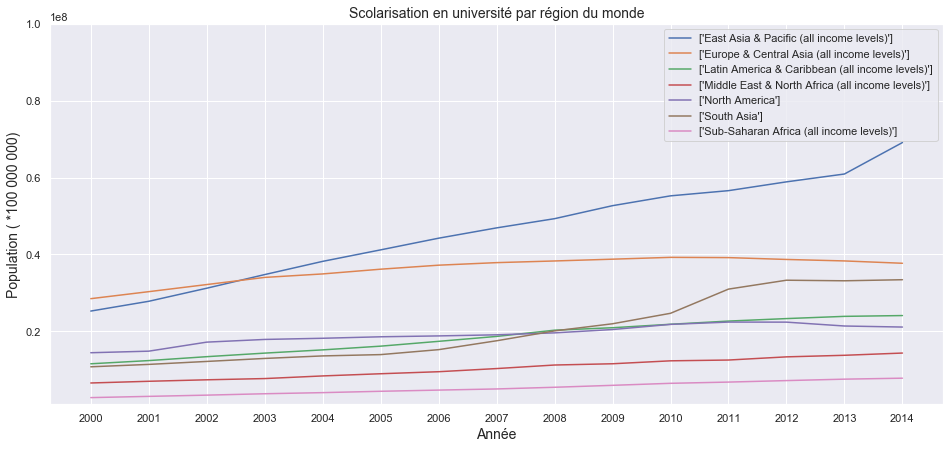

In [157]:
fig, ax = plt.subplots(figsize=(16,7))


for reg in RegionsMonde:
    line, = ax.plot(annee, result[reg], label = str(Region['Short Name'][Region['Country Code'] == reg].tolist()))

ax.set_xlabel('Année', fontsize = 14)
ax.set_ylim(1000000, 100000000) 
ax.set_ylabel('Population ( *100 000 000)', fontsize = 14)
plt.title('Scolarisation en université par région du monde', fontsize = 14)  
ax.legend()
plt.show()

L'analyse par région du nombre d'étudiant montre que l'Afrique est le continent avec le moins d'étudiant. La pôle position revient à l'Asie.

{'EAS': [[163077968.0], [162908832.0], [164205216.0], [166888336.0], [170967760.0], [176595568.0], [184041136.0], [191690096.0], [197322192.0], [199599664.0], [198826384.0], [194911616.0], [189351840.0], [182887728.0], [176505312.0], [nan], [nan], [nan]], 'ECS': [[63198288.0], [63572848.0], [64054076.0], [64486784.0], [64666152.0], [64870184.0], [65087564.0], [65209984.0], [65098584.0], [64662404.0], [63839908.0], [62602388.0], [61026108.0], [59402204.0], [57917924.0], [nan], [nan], [nan]], 'LCN': [[50961504.0], [50930632.0], [51287012.0], [51466160.0], [52021800.0], [52499548.0], [52586156.0], [52819048.0], [52819724.0], [52937096.0], [53869328.0], [52959336.0], [53256360.0], [53651980.0], [53930472.0], [nan], [nan], [nan]], 'MEA': [[32082812.0], [33190738.0], [34415120.0], [35586284.0], [36669360.0], [37405896.0], [38302468.0], [39084580.0], [39671168.0], [39963504.0], [39933664.0], [39597576.0], [39088808.0], [38452992.0], [37799832.0], [nan], [nan], [nan]], 'NAC': [[21439404.0], [2

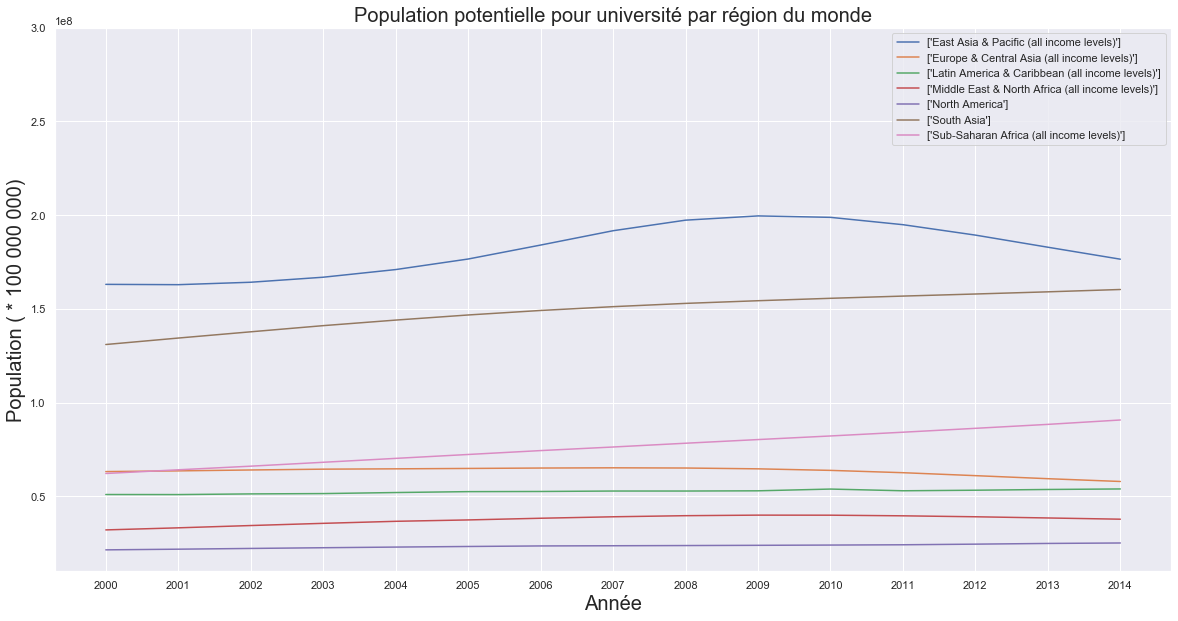

In [158]:
EvolutionRegionAnnee(SpTerTotlIn)
fig, ax = plt.subplots(figsize=(20,10))


for reg in RegionsMonde:
    line, = ax.plot(annee, result[reg], label = str(Region['Short Name'][Region['Country Code'] == reg].tolist()))

ax.set_xlabel('Année', fontsize = 20)
ax.set_ylim(10000000, 300000000) 
ax.set_ylabel('Population ( * 100 000 000)', fontsize = 20)
plt.title('Population potentielle pour université par région du monde', fontsize = 20)  
ax.legend()
plt.show()

In [159]:
EvolutionRegionAnnee(SeTerEnrr)

{'EAS': [[15.4879703521729], [17.0656204223633], [19.0017395019531], [20.8228797912598], [22.3364791870117], [23.31907081604], [24.0251197814941], [24.4657192230225], [24.982009887695302], [26.391630172729503], [27.779830932617198], [29.030969619751], [31.0924892425537], [33.3079605102539], [39.1477203369141], [nan], [nan], [nan]], 'ECS': [[45.0676498413086], [47.6705513000488], [50.196380615234396], [52.7449798583984], [54.001041412353494], [55.7300415039063], [57.144229888915994], [58.05522155761721], [58.818878173828104], [59.936008453369105], [61.452751159668], [62.561241149902294], [63.3925094604492], [64.475471496582], [65.0807266235352], [nan], [nan], [nan]], 'LCN': [[22.6449699401855], [24.294189453125], [26.107679367065398], [27.818660736084], [29.1398906707764], [30.7200908660889], [33.053409576416], [35.3281898498535], [38.4011192321777], [39.526481628418004], [40.5111694335938], [42.774330139160206], [43.7497482299805], [44.5082588195801], [44.6640701293945], [nan], [nan], 

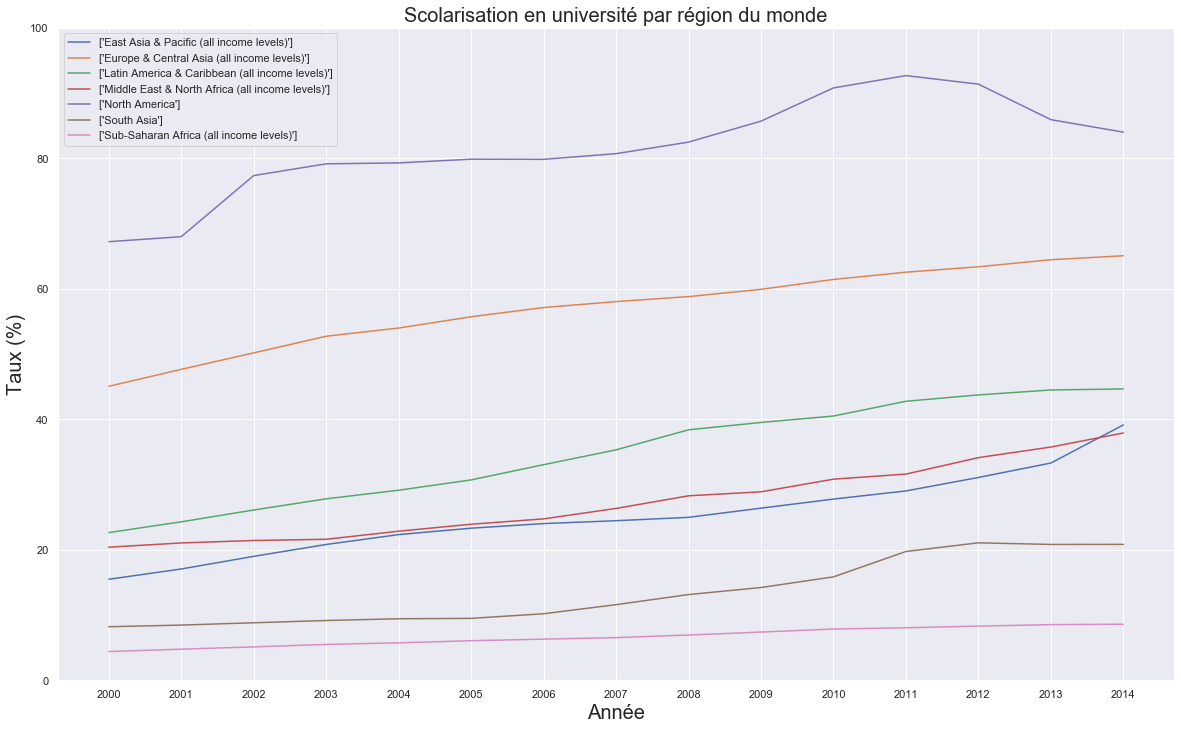

In [160]:
fig, ax = plt.subplots(figsize=(20,12))


for reg in RegionsMonde:
    line, = ax.plot(annee, result[reg], label = str(Region['Short Name'][Region['Country Code'] == reg].tolist()))

ax.set_xlabel('Année', fontsize = 20)
ax.set_ylim(0, 100) 
ax.set_ylabel('Taux (%)', fontsize = 20)
plt.title('Scolarisation en université par région du monde', fontsize = 20)  
ax.legend()
plt.show()

Pour le lycée et l'université, nous allons classer les pays avec le plus de potentiel.

In [161]:
# Nous sélectionnons les données par pays en supprimant les régions du monde.
SeSecEnrlPays = Data[( Data['Indicator Code'] == 'SE.SEC.ENRL' ) & ( Data['Country Code'].isin(PaysMonde))]
SeSecEnrlPays = SeSecEnrlPays[SeSecEnrlPays['2014'] > 500000]
PaysPotentielLycee = SeSecEnrlPays['Country Name']
PaysPotentielLyceeCode = SeSecEnrlPays['Country Code']
NombreLyceen = SeSecEnrlPays['2014']
PaysPotentielLycee

92816            Afghanistan
118471             Argentina
129466             Australia
133131               Austria
155121               Belarus
                 ...        
844141        United Kingdom
847806         United States
855136            Uzbekistan
862466         Venezuela, RB
873461    West Bank and Gaza
Name: Country Name, Length: 78, dtype: object

(array([0.0e+00, 2.0e+07, 4.0e+07, 6.0e+07, 8.0e+07, 1.0e+08, 1.2e+08,
        1.4e+08]), <a list of 8 Text yticklabel objects>)

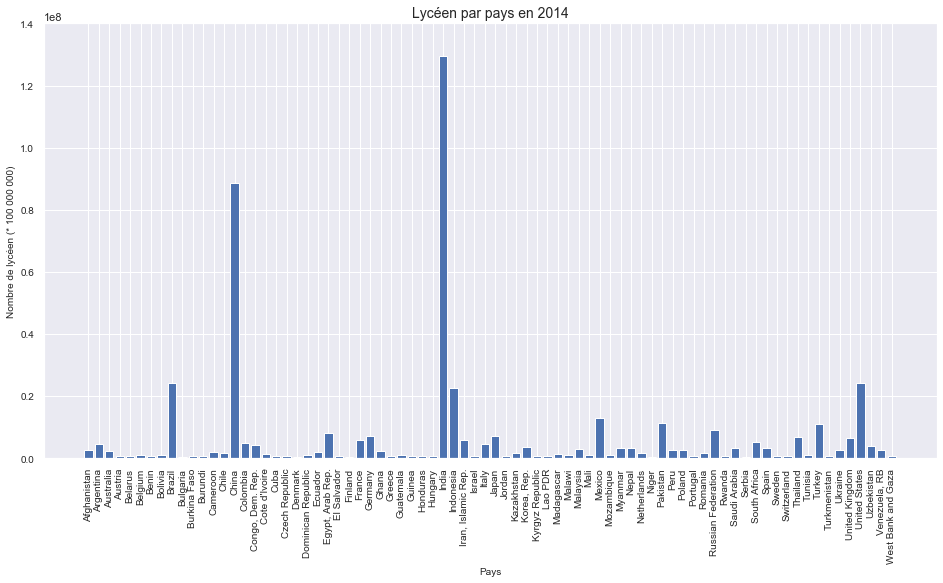

In [162]:
fig1 = plt.figure(figsize=(16,8))
axes = plt.axes()
axes.set_xlabel('Pays', fontsize = 10)
axes.set_ylabel('Nombre de lycéen (* 100 000 000)', fontsize = 10)
axes.set_ylim(0,140000000)
plt.title('Lycéen par pays en 2014', fontsize = 14)
plt.bar(PaysPotentielLycee,NombreLyceen)
plt.xticks(PaysPotentielLycee,rotation=90,fontsize = 10)
plt.yticks(fontsize=10)

(array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.,
        30000000., 35000000., 40000000., 45000000.]),
 <a list of 10 Text yticklabel objects>)

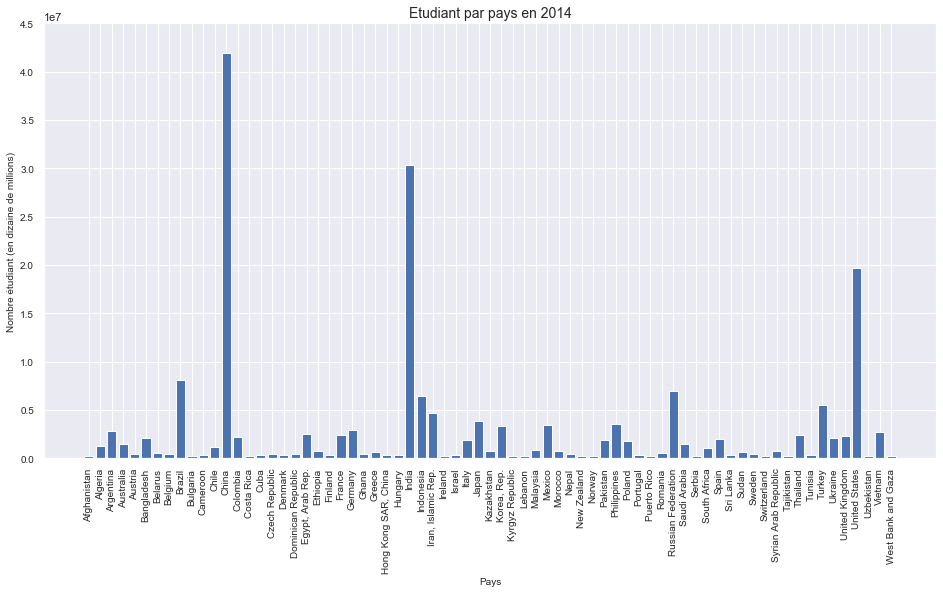

In [163]:
SeTerEnrlPays = Data[( Data['Indicator Code'] == 'SE.TER.ENRL' ) & ( Data['Country Code'].isin(PaysMonde))]
SeTerEnrlPays = SeTerEnrlPays[SeTerEnrlPays['2014'] > 200000]
PaysPotentielUniversite = SeTerEnrlPays['Country Name']
PaysPotentielUniversiteCode = SeTerEnrlPays['Country Code']
NombreEtudiant = SeTerEnrlPays['2014']
fig1 = plt.figure(figsize=(16,8))
axes = plt.axes()
axes.set_xlabel('Pays', fontsize = 10)
axes.set_ylabel('Nombre étudiant (en dizaine de millions)', fontsize = 10)
axes.set_ylim(0,45000000)
plt.title('Etudiant par pays en 2014', fontsize = 14)
plt.bar(PaysPotentielUniversite,NombreEtudiant)
plt.xticks(PaysPotentielUniversite,rotation = 90,fontsize = 10)
plt.yticks(fontsize = 10)


In [164]:
PaysPotentielUniversite

92829            Afghanistan
100159               Algeria
118484             Argentina
129479             Australia
133144               Austria
                 ...        
844154        United Kingdom
847819         United States
855149            Uzbekistan
866144               Vietnam
873474    West Bank and Gaza
Name: Country Name, Length: 71, dtype: object

#### 4.3 - [PIB et richesse des régions](#43)<a class="anchor" id="43"></a>

In [181]:
NyGdpPcapCd = Data[( Data['Indicator Code'] == 'NY.GDP.PCAP.CD' ) & ( Data['Country Code'].isin(RegionsMonde))]

In [182]:
EvolutionRegionAnnee(NyGdpPcapCd)

{'EAS': [[4055.7090917759497], [3738.6903488515795], [3766.8561268035496], [4108.86642848838], [4572.447267095779], [4842.26486586671], [5099.5241418222995], [5664.14343473964], [6495.933480916], [6648.004566367471], [7679.83420346662], [8844.822996505749], [9402.7228454186], [9447.70106725709], [9665.056079273309], [9541.87108884504], [9787.77554544772], [nan]], 'ECS': [[11626.2133526115], [11721.0932859547], [12799.364278619], [15550.032025098999], [18071.333755953998], [19191.5920370302], [20709.68565079], [24108.847782496003], [26352.5392240169], [23084.226956438903], [23536.905927455202], [26015.8890003278], [24970.9751525851], [25976.5546342867], [26192.9347654669], [22442.214807854198], [22230.2036514004], [nan]], 'LCN': [[4310.148146850011], [4143.04509397166], [3664.9885364740203], [3724.38238615163], [4246.395764493211], [5075.12869549452], [5877.23228687808], [6845.832331143571], [7860.10392207303], [7299.81292099225], [8943.388373677879], [10047.937099889], [10025.807442509

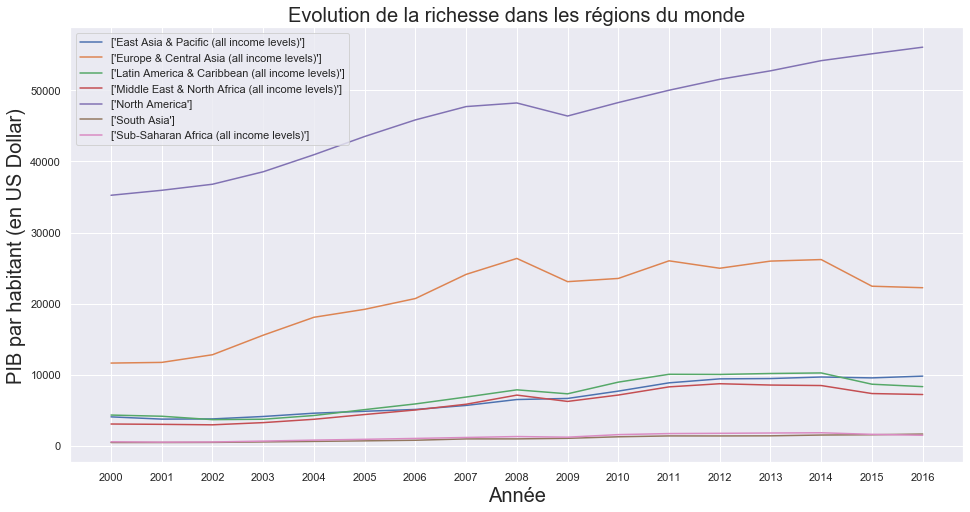

In [183]:
fig, ax = plt.subplots(figsize=(16,8))


for reg in RegionsMonde:
    line, = ax.plot(annee, result[reg], label = str(Region['Short Name'][Region['Country Code'] == reg].tolist()))

ax.set_xlabel('Année', fontsize = 20)
#ax.set_ylim(1000000, 100000000) 
ax.set_ylabel('PIB par habitant (en US Dollar)', fontsize = 20)
plt.title('Evolution de la richesse dans les régions du monde', fontsize = 20)  
ax.legend()
plt.show()

In [184]:
PaysPotentielPIBParRegion = Pays['Country Code'][(Pays['Region'] == 'East Asia & Pacific')|
     (Pays['Region'] == 'Europe & Central Asia')|(Pays['Region'] == 'Latin America & Caribbean')|
     (Pays['Region'] == 'Middle East & North Africa') |(Pays['Region'] == 'North America')|
     (Pays['Region'] == 'Sub-Saharan Africa')|(Pays['Region'] == 'South Asia')].tolist()
len(PaysPotentielPIBParRegion)

214

In [185]:
DataPIB = Data[( Data['Indicator Code'] == 'NY.GDP.PCAP.CD' ) & ( Data['Country Code'].isin(PaysPotentielPIBParRegion))]

In [186]:
PaysPotentielPIB = DataPIB['Country Name'][DataPIB['2016'] > 10000]
PaysPotentielPIBCode = DataPIB['Country Code'][DataPIB['2016'] > 10000]
PIB = DataPIB['2016'][DataPIB['2016'] > 10000]
PaysPotentielPIB

103865          American Samoa
107530                 Andorra
114860     Antigua and Barbuda
118525               Argentina
129520               Australia
                  ...         
818540                  Turkey
840530    United Arab Emirates
844195          United Kingdom
847860           United States
851525                 Uruguay
Name: Country Name, Length: 65, dtype: object

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text yticklabel objects>)

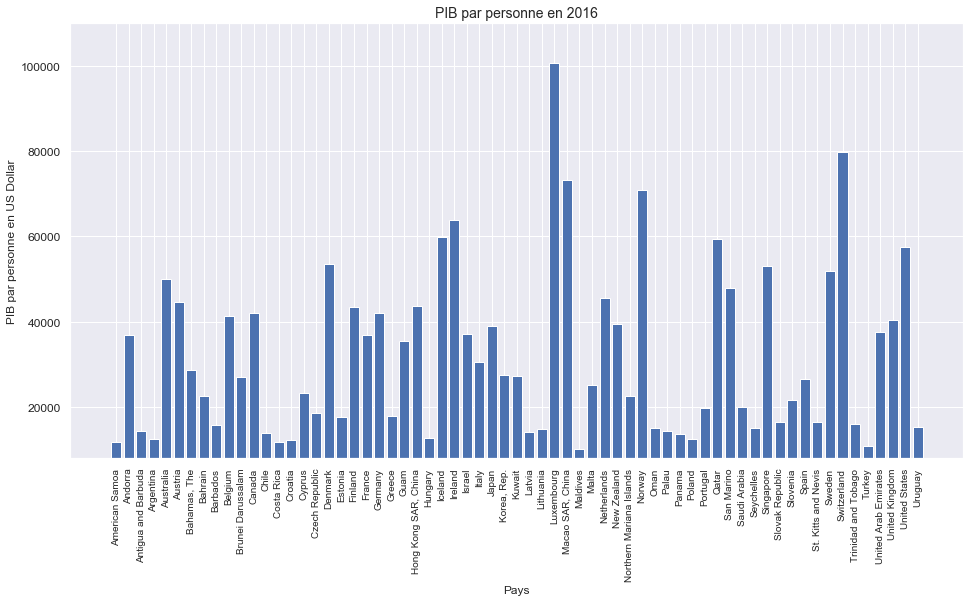

In [187]:
fig1 = plt.figure(figsize=(16,8))
axes = plt.axes()
axes.set_xlabel('Pays', fontsize = 12)
axes.set_ylabel('PIB par personne en US Dollar', fontsize = 12)
axes.set_ylim(8000,110000)
plt.title('PIB par personne en 2016', fontsize = 14)
plt.bar(PaysPotentielPIB,PIB)
plt.xticks(PaysPotentielPIB,rotation=90,fontsize=10)
plt.yticks(fontsize=12)

#### 4.4 - [Pays remplissant les 3 critères](#44)<a class="anchor" id="44"></a>

In [190]:
#Pour le lycée :  
PaysPotentielSec = pd.merge(PaysPotentielPIB,PaysPotentielLycee)
PaysPotentielSec = pd.merge(PaysPotentielSec,PaysPotentielInternet)
PaysPotentielSecL = PaysPotentielSec['Country Name'].tolist()

# Pour l'université :
PaysPotentielTer = pd.merge(PaysPotentielPIB,PaysPotentielUniversite)
PaysPotentielTer = pd.merge(PaysPotentielTer,PaysPotentielInternet)
PaysPotentielTerL = PaysPotentielTer['Country Name'].tolist()

# Pour les deux :
PaysPotentielSecTer = pd.merge(PaysPotentielTer,PaysPotentielSec)
print("Pays potentiels pour le lycée: \n" , PaysPotentielSec ,"\n\n Pays potentiels pour l'univeristé: \n", PaysPotentielTer,
      "\n\n Pays potentiels pour les deux: \n", PaysPotentielSecTer)

Pays potentiels pour le lycée: 
       Country Name
0        Argentina
1        Australia
2          Austria
3          Belgium
4            Chile
5   Czech Republic
6          Denmark
7          Finland
8           France
9          Germany
10          Greece
11         Hungary
12          Israel
13           Italy
14           Japan
15     Korea, Rep.
16     Netherlands
17          Poland
18        Portugal
19    Saudi Arabia
20           Spain
21          Sweden
22     Switzerland
23  United Kingdom
24   United States 

 Pays potentiels pour l'univeristé: 
             Country Name
0              Argentina
1              Australia
2                Austria
3                Belgium
4                  Chile
5             Costa Rica
6         Czech Republic
7                Denmark
8                Finland
9                 France
10               Germany
11                Greece
12  Hong Kong SAR, China
13               Hungary
14               Ireland
15                Israel
16      

In [193]:
x = DataPIB.merge(PaysPotentielSec)['2014']
x


0     12245.256449
1     62214.609121
2     51733.481917
3     47379.173917
4     14817.377777
5     19744.558609
6     62548.985017
7     49914.618642
8     42955.242866
9     48042.563435
10    21760.979799
11    14201.448832
12    37539.951817
13    35396.665724
14    38096.211505
15    27811.366384
16    52157.406870
17    14339.674546
18    22077.536133
19    24575.403038
20    29623.164445
21    59180.198978
22    86605.563376
23    46783.469217
24    54598.550689
Name: 2014, dtype: float64

In [194]:
y = AccesInternet.merge(PaysPotentielSec)['2014']
y

0     64.700000
1     84.000000
2     80.995825
3     85.000000
4     61.110000
5     74.231712
6     95.990000
7     86.530393
8     83.750000
9     86.190000
10    63.210000
11    75.653197
12    75.017753
13    55.638460
14    89.106833
15    87.556826
16    91.666666
17    66.600000
18    64.590000
19    64.713657
20    76.190000
21    92.520000
22    87.400000
23    91.610000
24    73.000000
Name: 2014, dtype: float64

In [198]:
su = (SeSecEnrlPays.merge(PaysPotentielSec)['2014']/10000)
su

0      445.074100
1      237.128400
2       69.738844
3      121.011200
4      155.637200
5       78.139200
6       55.379100
7       53.692500
8      594.721200
9      720.107200
10      66.771800
11      85.780700
12      76.772900
13     459.691600
14     722.748500
15     357.941100
16     157.399800
17     264.128700
18      76.863100
19     341.944100
20     328.842400
21      82.669400
22      61.612700
23     655.699150
24    2422.977600
Name: 2014, dtype: float64

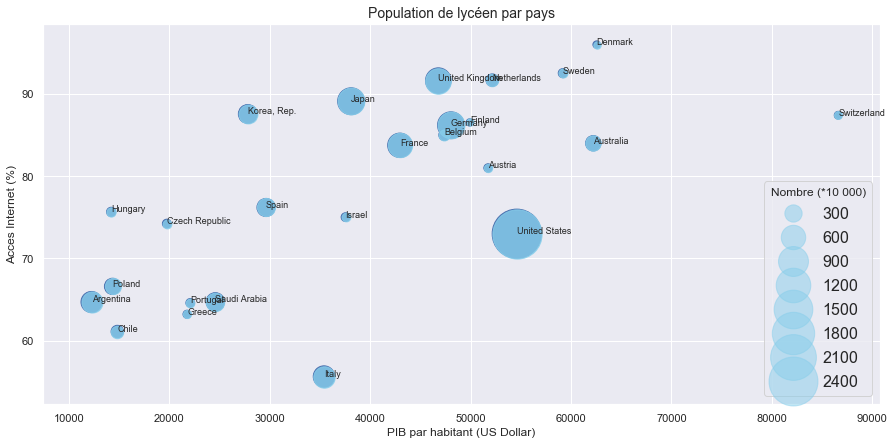

In [204]:
fig, ax = plt.subplots(figsize=(15,7))

ax.set_xlabel('PIB par habitant (US Dollar)', fontsize = 12)
ax.set_ylabel('Acces Internet (%)', fontsize = 12)
plt.title('Population de lycéen par pays', fontsize = 14)
scatter = ax.scatter(x, y, s=su)
for i in range(25):
    a = x[i]
    b = y[i]
    c = su[i]
    text = "".join(PaysPotentielSec.iloc[i].tolist())
    plt.scatter(a, b, s = c, alpha = 0.8, color = 'skyblue')
    plt.text(a, b,text,  fontsize=9)

handles, labels = scatter.legend_elements(prop = 'sizes', num = 6, alpha=0.5, color = 'skyblue')
legend2 = ax.legend(handles, labels, loc="lower right", title="Nombre (*10 000)", fontsize=16)
plt.show()


In [87]:
xx = DataPIB.merge(PaysPotentielTer)['2014']
yy = AccesInternet.merge(PaysPotentielTer)['2014']
ss = (SeTerEnrlPays.merge(PaysPotentielTer)['2014']/10000)


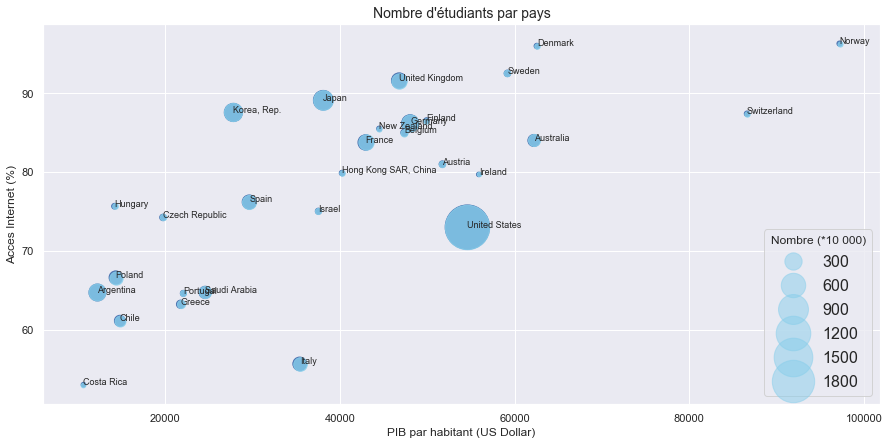

In [205]:
fig, ax = plt.subplots(figsize=(15,7))

ax.set_xlabel('PIB par habitant (US Dollar)', fontsize = 12)
ax.set_ylabel('Acces Internet (%)', fontsize = 12)
plt.title("Nombre d'étudiants par pays", fontsize = 14)
scatter = ax.scatter(xx, yy, s=ss)
handles, labels = scatter.legend_elements(prop = 'sizes',num = 6, alpha=0.5, color = 'skyblue')
legend2 = ax.legend(handles, labels, loc="lower right", title="Nombre (*10 000)", fontsize=16)
for i in range(len(xx)):
    a = xx[i]
    b = yy[i]
    c = ss[i]
    text = "".join(PaysPotentielTer.iloc[i].tolist())
    plt.scatter(a, b, s = c, alpha = 0.8, color = 'skyblue')
    plt.text(a, b,text,  fontsize=9)
plt.show()


#### 4.5 - [Projections](#45)<a class="anchor" id="45"></a>

In [212]:
# Nous sélectionnons les données pour les pays qui remplissent les 3 criteres

PrjPopAll3 = Data[( Data['Indicator Code'] == 'PRJ.POP.ALL.3.MF' ) & ( Data['Country Name'].isin(PaysPotentielSecL))]
PrjPopAll4 = Data[( Data['Indicator Code'] == 'PRJ.POP.ALL.4.MF' ) & ( Data['Country Name'].isin(PaysPotentielTerL))]
PrjPopAll4


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Indicator Group
120930,Argentina,ARG,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,12643.22,13518.02,14341.65,15104.50,15804.15,16442.59,17015.97,17522.79,NaN,PRJ
131925,Australia,AUS,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,17740.31,18910.48,20012.57,21024.42,21927.90,22714.34,23391.40,23962.70,NaN,PRJ
135590,Austria,AUT,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,3965.71,4130.66,4280.01,4408.02,4510.13,4585.69,4638.24,4673.69,NaN,PRJ
161245,Belgium,BEL,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,7173.97,7517.98,7832.89,8116.68,8367.39,8582.89,8762.75,8905.35,NaN,PRJ
241875,Chile,CHL,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,5989.51,6304.72,6591.17,6849.83,7075.89,7266.60,7427.25,7558.70,NaN,PRJ
263865,Costa Rica,CRI,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,1938.12,2069.94,2193.80,2307.17,2407.50,2493.17,2566.18,2628.35,NaN,PRJ
285855,Czech Republic,CZE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,2690.57,2846.79,2999.32,3143.84,3280.16,3410.89,3538.88,3663.25,NaN,PRJ
289520,Denmark,DNK,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,2420.78,2582.26,2742.20,2905.65,3071.56,3232.99,3382.88,3518.69,NaN,PRJ
337165,Finland,FIN,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,2795.80,2902.86,3011.18,3118.64,3222.40,3320.17,3411.39,3497.14,NaN,PRJ
340830,France,FRA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,37113.60,39371.57,41463.54,43391.10,45163.21,46788.19,48256.36,49546.78,NaN,PRJ


In [213]:
# On rajoute la progression pour les pays entre 2020 et 2025
PrjPopAll3['Prog2025'] = (PrjPopAll3['2025'] - PrjPopAll3['2020']) / PrjPopAll3['2025']
PrjPopAll3['Prog2030'] = (PrjPopAll3['2030'] - PrjPopAll3['2025']) / PrjPopAll3['2030']
PrjPopAll4['Prog2025'] = (PrjPopAll4['2025'] - PrjPopAll4['2020']) / PrjPopAll4['2025']
PrjPopAll4['Prog2030'] = (PrjPopAll4['2030'] - PrjPopAll4['2025']) / PrjPopAll4['2030']
PrjPopAll4

C:\Users\GENTHON-M\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\GENTHON-M\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\GENTHON-M\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2075,2080,2085,2090,2095,2100,Unnamed: 69,Indicator Group,Prog2025,Prog2030
120930,Argentina,ARG,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,14341.65,15104.50,15804.15,16442.59,17015.97,17522.79,NaN,PRJ,0.135423,0.124654
131925,Australia,AUS,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,20012.57,21024.42,21927.90,22714.34,23391.40,23962.70,NaN,PRJ,0.118448,0.112105
135590,Austria,AUT,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,4280.01,4408.02,4510.13,4585.69,4638.24,4673.69,NaN,PRJ,0.096072,0.087840
161245,Belgium,BEL,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,7832.89,8116.68,8367.39,8582.89,8762.75,8905.35,NaN,PRJ,0.102499,0.097396
241875,Chile,CHL,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,6591.17,6849.83,7075.89,7266.60,7427.25,7558.70,NaN,PRJ,0.130575,0.117888
263865,Costa Rica,CRI,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,2193.80,2307.17,2407.50,2493.17,2566.18,2628.35,NaN,PRJ,0.134790,0.119802
285855,Czech Republic,CZE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,2999.32,3143.84,3280.16,3410.89,3538.88,3663.25,NaN,PRJ,0.056361,0.062410
289520,Denmark,DNK,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,2742.20,2905.65,3071.56,3232.99,3382.88,3518.69,NaN,PRJ,0.090937,0.082382
337165,Finland,FIN,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,3011.18,3118.64,3222.40,3320.17,3411.39,3497.14,NaN,PRJ,0.044651,0.038997
340830,France,FRA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,41463.54,43391.10,45163.21,46788.19,48256.36,49546.78,NaN,PRJ,0.120853,0.114997


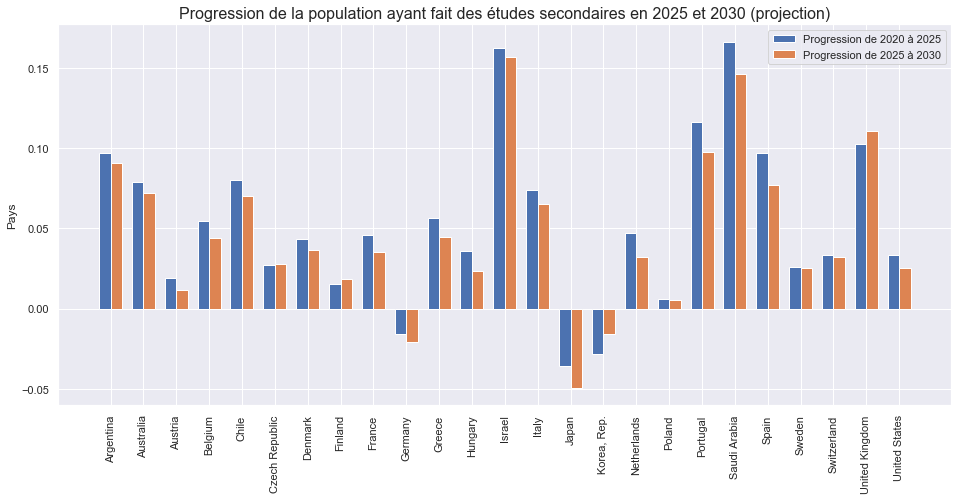

In [214]:
labels = PrjPopAll3['Country Name']
Prog2025 = PrjPopAll3['Prog2025']
Prog2030 = PrjPopAll3['Prog2030']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,7))
rects1 = ax.bar(x - width/2, Prog2025, width, label='Progression de 2020 à 2025')
rects2 = ax.bar(x + width/2, Prog2030, width, label='Progression de 2025 à 2030')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Progression')
ax.set_ylabel('Pays')
ax.set_title('Progression de la population ayant fait des études secondaires en 2025 et 2030 (projection)', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

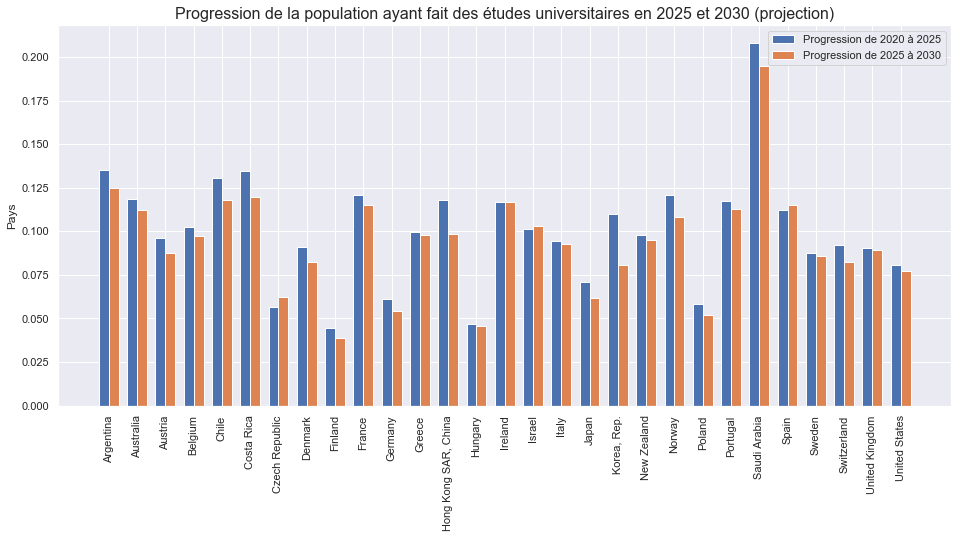

In [215]:
labels = PrjPopAll4['Country Name']
Prog2025 = PrjPopAll4['Prog2025']
Prog2030 = PrjPopAll4['Prog2030']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(16,7))
rects1 = ax.bar(x - width/2, Prog2025, width, label='Progression de 2020 à 2025')
rects2 = ax.bar(x + width/2, Prog2030, width, label='Progression de 2025 à 2030')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Progression')
ax.set_ylabel('Pays')
ax.set_title('Progression de la population ayant fait des études universitaires en 2025 et 2030 (projection)', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

(array([-0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 <a list of 9 Text yticklabel objects>)

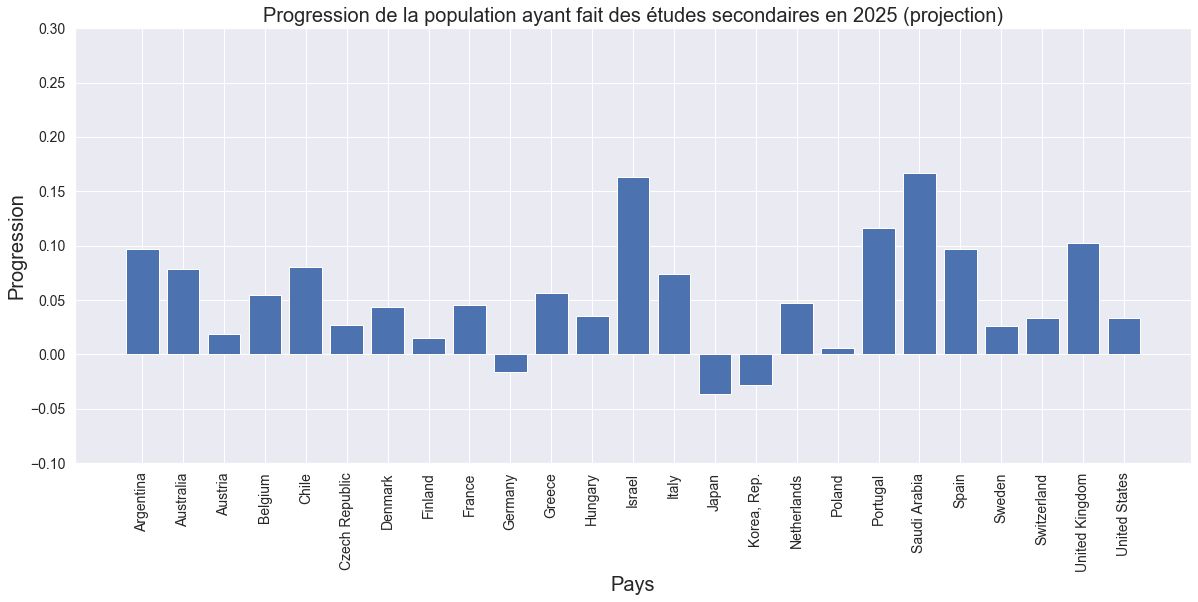

In [216]:
#premier jet
fig1 = plt.figure(figsize=(20,8))
axes = plt.axes()
axes.set_xlabel('Pays', fontsize = 20)
axes.set_ylabel('Progression', fontsize = 20)
axes.set_ylim(-0.1,0.3)
plt.title('Progression de la population ayant fait des études secondaires en 2025 (projection)', fontsize = 20)
plt.bar(PrjPopAll3['Country Name'],PrjPopAll3['Prog2025'])
plt.xticks(PrjPopAll3['Country Name'],rotation=90,fontsize=14)
plt.yticks(fontsize=14)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text yticklabel objects>)

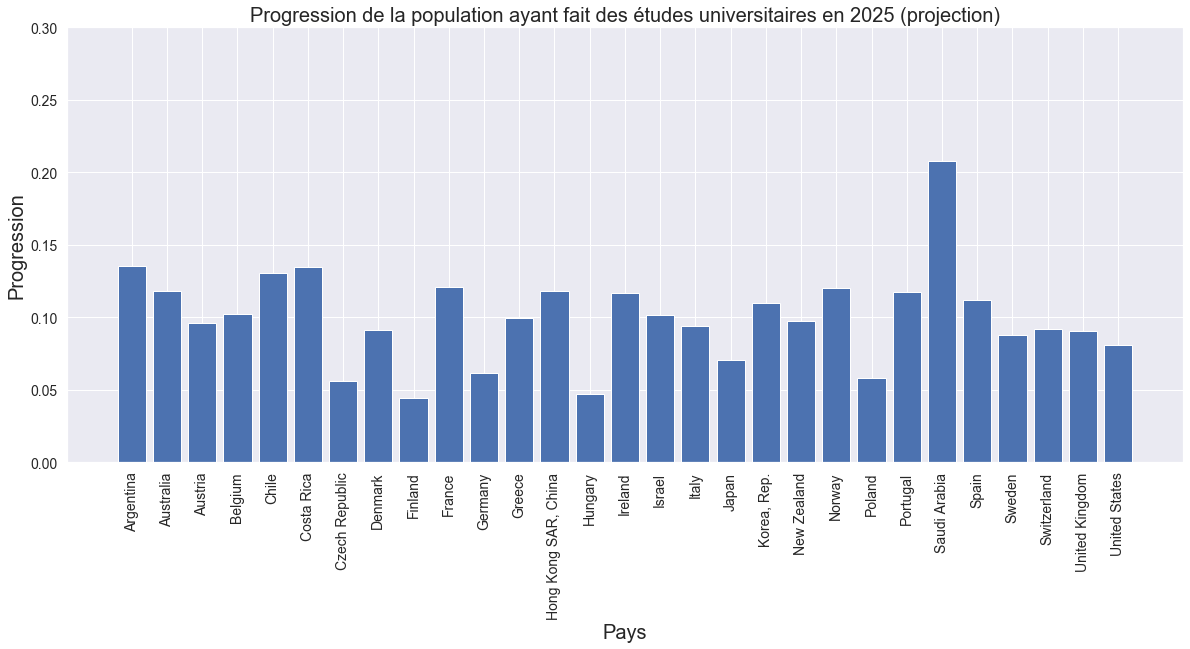

In [217]:
#premier jet
fig1 = plt.figure(figsize=(20,8))
axes = plt.axes()
axes.set_xlabel('Pays', fontsize = 20)
axes.set_ylabel('Progression', fontsize = 20)
axes.set_ylim(0,0.3)
plt.title('Progression de la population ayant fait des études universitaires en 2025 (projection)', fontsize = 20)
plt.bar(PrjPopAll4['Country Name'],PrjPopAll4['Prog2025'])
plt.xticks(PrjPopAll4['Country Name'],rotation=90,fontsize=14)
plt.yticks(fontsize=14)